In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import glob
import os
import xarray as xr
from matplotlib.pyplot import figure
import skill_metrics as sm
plt.close('all')

Reading in data: for each dataset (ERA-5, WRF, MERRA-2, Lidar), I follow the same steps:
1. read in the file to a dataframe
2. create an array of zeros and fill it with values for each height
3. create an array of zeros for each season and fill it with values for each height
4. create dataframes that show the mean and standard deviation for diurnal cycle overall and during each season 

In [4]:
# Vansycle ERA5

# read in file
VansycleERAdf=pd.read_csv('/projects/sebu3651/ProjectResearch/Vansycle/VansycleERA5/VansycleERA')
VansycleERAdf.set_index('time', inplace=True)

# filter dataframe to match observational period
VansycleERAdf=VansycleERAdf[(VansycleERAdf.index >='2016-03-09 21:00:00')&(VansycleERAdf.index<='2017-01-31 23:00:00') ]

# create array of zeros and fill with wind speed data for each height
VansycleERAWS=np.zeros((7875,11))
VansycleERAWS[:,10]=VansycleERAdf[VansycleERAdf.height==10].wind_speed
VansycleERAWS[:,9]=VansycleERAdf[VansycleERAdf.height==31].wind_speed
VansycleERAWS[:,8]=VansycleERAdf[VansycleERAdf.height==54].wind_speed
VansycleERAWS[:,7]=VansycleERAdf[VansycleERAdf.height==79].wind_speed
VansycleERAWS[:,6]=VansycleERAdf[VansycleERAdf.height==106].wind_speed
VansycleERAWS[:,5]=VansycleERAdf[VansycleERAdf.height==137].wind_speed
VansycleERAWS[:,4]=VansycleERAdf[VansycleERAdf.height==170].wind_speed
VansycleERAWS[:,3]=VansycleERAdf[VansycleERAdf.height==205].wind_speed
VansycleERAWS[:,2]=VansycleERAdf[VansycleERAdf.height==245].wind_speed
VansycleERAWS[:,1]=VansycleERAdf[VansycleERAdf.height==288].wind_speed
VansycleERAWS[:,0]=VansycleERAdf[VansycleERAdf.height==334].wind_speed

# list of z values for ERA-5 heights
VansycleERAZ=[334, 288, 245, 205, 170, 137, 106, 79, 54, 31, 10]

In [5]:
# creating winter ERA5 array
VansycleERADJFdf=VansycleERAdf[(VansycleERAdf.index.str.contains('-12-'))|(VansycleERAdf.index.str.contains('-01-'))|(VansycleERAdf.index.str.contains('-02-'))]
VansycleERAWSDJF=np.zeros((1488,11))
VansycleERAWSDJF[:,10]=VansycleERADJFdf[VansycleERADJFdf.height==10].wind_speed
VansycleERAWSDJF[:,9]=VansycleERADJFdf[VansycleERADJFdf.height==31].wind_speed
VansycleERAWSDJF[:,8]=VansycleERADJFdf[VansycleERADJFdf.height==54].wind_speed
VansycleERAWSDJF[:,7]=VansycleERADJFdf[VansycleERADJFdf.height==79].wind_speed
VansycleERAWSDJF[:,6]=VansycleERADJFdf[VansycleERADJFdf.height==106].wind_speed
VansycleERAWSDJF[:,5]=VansycleERADJFdf[VansycleERADJFdf.height==137].wind_speed
VansycleERAWSDJF[:,4]=VansycleERADJFdf[VansycleERADJFdf.height==170].wind_speed
VansycleERAWSDJF[:,3]=VansycleERADJFdf[VansycleERADJFdf.height==205].wind_speed
VansycleERAWSDJF[:,2]=VansycleERADJFdf[VansycleERADJFdf.height==245].wind_speed
VansycleERAWSDJF[:,1]=VansycleERADJFdf[VansycleERADJFdf.height==288].wind_speed
VansycleERAWSDJF[:,0]=VansycleERADJFdf[VansycleERADJFdf.height==334].wind_speed

# creating spring ERA5 array
VansycleERAMAMdf=VansycleERAdf[(VansycleERAdf.index.str.contains('-03-'))|(VansycleERAdf.index.str.contains('-04-'))|(VansycleERAdf.index.str.contains('-05-'))]
VansycleERAWSMAM=np.zeros((1995,11))
VansycleERAWSMAM[:,10]=VansycleERAMAMdf[VansycleERAMAMdf.height==10].wind_speed
VansycleERAWSMAM[:,9]=VansycleERAMAMdf[VansycleERAMAMdf.height==31].wind_speed
VansycleERAWSMAM[:,8]=VansycleERAMAMdf[VansycleERAMAMdf.height==54].wind_speed
VansycleERAWSMAM[:,7]=VansycleERAMAMdf[VansycleERAMAMdf.height==79].wind_speed
VansycleERAWSMAM[:,6]=VansycleERAMAMdf[VansycleERAMAMdf.height==106].wind_speed
VansycleERAWSMAM[:,5]=VansycleERAMAMdf[VansycleERAMAMdf.height==137].wind_speed
VansycleERAWSMAM[:,4]=VansycleERAMAMdf[VansycleERAMAMdf.height==170].wind_speed
VansycleERAWSMAM[:,3]=VansycleERAMAMdf[VansycleERAMAMdf.height==205].wind_speed
VansycleERAWSMAM[:,2]=VansycleERAMAMdf[VansycleERAMAMdf.height==245].wind_speed
VansycleERAWSMAM[:,1]=VansycleERAMAMdf[VansycleERAMAMdf.height==288].wind_speed
VansycleERAWSMAM[:,0]=VansycleERAMAMdf[VansycleERAMAMdf.height==334].wind_speed

# creating summer ERA5 array
VansycleERAJJAdf=VansycleERAdf[(VansycleERAdf.index.str.contains('-06-'))|(VansycleERAdf.index.str.contains('-07-'))|(VansycleERAdf.index.str.contains('-08-'))]
VansycleERAWSJJA=np.zeros((2208,11))
VansycleERAWSJJA[:,10]=VansycleERAJJAdf[VansycleERAJJAdf.height==10].wind_speed
VansycleERAWSJJA[:,9]=VansycleERAJJAdf[VansycleERAJJAdf.height==31].wind_speed
VansycleERAWSJJA[:,8]=VansycleERAJJAdf[VansycleERAJJAdf.height==54].wind_speed
VansycleERAWSJJA[:,7]=VansycleERAJJAdf[VansycleERAJJAdf.height==79].wind_speed
VansycleERAWSJJA[:,6]=VansycleERAJJAdf[VansycleERAJJAdf.height==106].wind_speed
VansycleERAWSJJA[:,5]=VansycleERAJJAdf[VansycleERAJJAdf.height==137].wind_speed
VansycleERAWSJJA[:,4]=VansycleERAJJAdf[VansycleERAJJAdf.height==170].wind_speed
VansycleERAWSJJA[:,3]=VansycleERAJJAdf[VansycleERAJJAdf.height==205].wind_speed
VansycleERAWSJJA[:,2]=VansycleERAJJAdf[VansycleERAJJAdf.height==245].wind_speed
VansycleERAWSJJA[:,1]=VansycleERAJJAdf[VansycleERAJJAdf.height==288].wind_speed
VansycleERAWSJJA[:,0]=VansycleERAJJAdf[VansycleERAJJAdf.height==334].wind_speed

# creating fall ERA5 array 
VansycleERASONdf=VansycleERAdf[(VansycleERAdf.index.str.contains('-09-'))|(VansycleERAdf.index.str.contains('-10-'))|(VansycleERAdf.index.str.contains('-11-'))]
VansycleERAWSSON=np.zeros((2184,11))
VansycleERAWSSON[:,10]=VansycleERASONdf[VansycleERASONdf.height==10].wind_speed
VansycleERAWSSON[:,9]=VansycleERASONdf[VansycleERASONdf.height==31].wind_speed
VansycleERAWSSON[:,8]=VansycleERASONdf[VansycleERASONdf.height==54].wind_speed
VansycleERAWSSON[:,7]=VansycleERASONdf[VansycleERASONdf.height==79].wind_speed
VansycleERAWSSON[:,6]=VansycleERASONdf[VansycleERASONdf.height==106].wind_speed
VansycleERAWSSON[:,5]=VansycleERASONdf[VansycleERASONdf.height==137].wind_speed
VansycleERAWSSON[:,4]=VansycleERASONdf[VansycleERASONdf.height==170].wind_speed
VansycleERAWSSON[:,3]=VansycleERASONdf[VansycleERASONdf.height==205].wind_speed
VansycleERAWSSON[:,2]=VansycleERASONdf[VansycleERASONdf.height==245].wind_speed
VansycleERAWSSON[:,1]=VansycleERASONdf[VansycleERASONdf.height==288].wind_speed
VansycleERAWSSON[:,0]=VansycleERASONdf[VansycleERASONdf.height==334].wind_speed

In [6]:
# creating dataframe for overall ERA diurnal cycle using height of 106
VansycleERAdiurnal=VansycleERAdf[VansycleERAdf.height==106][['wind_speed']].copy()
VansycleERAdiurnal.index=pd.to_datetime(VansycleERAdiurnal.index)
VansycleERAdiurnal=VansycleERAdiurnal.groupby(VansycleERAdiurnal.index.hour).mean()

VansycleERAdiurnalStd=VansycleERAdf[VansycleERAdf.height==106][['wind_speed']].copy()
VansycleERAdiurnalStd.index=pd.to_datetime(VansycleERAdiurnalStd.index)
VansycleERAdiurnalStd=VansycleERAdiurnalStd.groupby(VansycleERAdiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
VansycleERADJFdiurnal=VansycleERADJFdf[VansycleERADJFdf.height==106][['wind_speed']].copy()
VansycleERADJFdiurnal.index=pd.to_datetime(VansycleERADJFdiurnal.index)
VansycleERADJFdiurnal=VansycleERADJFdiurnal.groupby(VansycleERADJFdiurnal.index.hour).mean()

VansycleERADJFdiurnalStd=VansycleERADJFdf[VansycleERADJFdf.height==106][['wind_speed']].copy()
VansycleERADJFdiurnalStd.index=pd.to_datetime(VansycleERADJFdiurnalStd.index)
VansycleERADJFdiurnalStd=VansycleERADJFdiurnalStd.groupby(VansycleERADJFdiurnalStd.index.hour).std()

# creating dataframes for spring diurnal cycle
VansycleERAMAMdiurnal=VansycleERAMAMdf[VansycleERAMAMdf.height==106][['wind_speed']].copy()
VansycleERAMAMdiurnal.index=pd.to_datetime(VansycleERAMAMdiurnal.index)
VansycleERAMAMdiurnal=VansycleERAMAMdiurnal.groupby(VansycleERAMAMdiurnal.index.hour).mean()

VansycleERAMAMdiurnalStd=VansycleERAMAMdf[VansycleERAMAMdf.height==106][['wind_speed']].copy()
VansycleERAMAMdiurnalStd.index=pd.to_datetime(VansycleERAMAMdiurnalStd.index)
VansycleERAMAMdiurnalStd=VansycleERAMAMdiurnalStd.groupby(VansycleERAMAMdiurnalStd.index.hour).std()

# creating dataframes for summer diurnal cycle
VansycleERAJJAdiurnal=VansycleERAJJAdf[VansycleERAJJAdf.height==106][['wind_speed']].copy()
VansycleERAJJAdiurnal.index=pd.to_datetime(VansycleERAJJAdiurnal.index)
VansycleERAJJAdiurnal=VansycleERAJJAdiurnal.groupby(VansycleERAJJAdiurnal.index.hour).mean()

VansycleERAJJAdiurnalStd=VansycleERAJJAdf[VansycleERAJJAdf.height==106][['wind_speed']].copy()
VansycleERAJJAdiurnalStd.index=pd.to_datetime(VansycleERAJJAdiurnalStd.index)
VansycleERAJJAdiurnalStd=VansycleERAJJAdiurnalStd.groupby(VansycleERAJJAdiurnalStd.index.hour).std()

# creating dataframes for fall dirunal cycle
VansycleERASONdiurnal=VansycleERASONdf[VansycleERASONdf.height==106][['wind_speed']].copy()
VansycleERASONdiurnal.index=pd.to_datetime(VansycleERASONdiurnal.index)
VansycleERASONdiurnal=VansycleERASONdiurnal.groupby(VansycleERASONdiurnal.index.hour).mean()

VansycleERASONdiurnalStd=VansycleERASONdf[VansycleERASONdf.height==106][['wind_speed']].copy()
VansycleERASONdiurnalStd.index=pd.to_datetime(VansycleERASONdiurnalStd.index)
VansycleERASONdiurnalStd=VansycleERASONdiurnalStd.groupby(VansycleERASONdiurnalStd.index.hour).std()

In [7]:
# Vansycle WRF

# reading in WRF data
VansycleWRFdf=pd.read_csv('/projects/sebu3651/ProjectResearch/Vansycle/VansycleWRF/VansycleWRF')
VansycleWRFdf.set_index('time',inplace=True)

# filtering WRF data to match observational period
VansycleWRFdf=VansycleWRFdf[(VansycleWRFdf.index >='2016-03-09 21:00:00')&(VansycleWRFdf.index<='2017-02-01 00:00:00') ]

# create an array of zeros and fill for each WRF height
VansycleWRFWS=np.zeros((7875,8))
VansycleWRFWS[:,0]=VansycleWRFdf['windspeed_60m']
VansycleWRFWS[:,1]=VansycleWRFdf['windspeed_80m']
VansycleWRFWS[:,2]=VansycleWRFdf['windspeed_100m']
VansycleWRFWS[:,3]=VansycleWRFdf['windspeed_120m']
VansycleWRFWS[:,4]=VansycleWRFdf['windspeed_140m']
VansycleWRFWS[:,5]=VansycleWRFdf['windspeed_160m']
VansycleWRFWS[:,6]=VansycleWRFdf['windspeed_180m']
VansycleWRFWS[:,7]=VansycleWRFdf['windspeed_200m']

# z values for WRF heights
VansycleWRFZ=[60.,80.,100.,120.,140.,160.,180.,200.]

In [7]:
# creating winter WRF array
VansycleWRFDJFdf=VansycleWRFdf[(VansycleWRFdf.index.str.contains('-12-'))|(VansycleWRFdf.index.str.contains('-01-'))|(VansycleWRFdf.index.str.contains('-02-'))]
VansycleWRFWSDJF=np.zeros((1488,8))
VansycleWRFWSDJF[:,0]=VansycleWRFDJFdf['windspeed_60m']
VansycleWRFWSDJF[:,1]=VansycleWRFDJFdf['windspeed_80m']
VansycleWRFWSDJF[:,2]=VansycleWRFDJFdf['windspeed_100m']
VansycleWRFWSDJF[:,3]=VansycleWRFDJFdf['windspeed_120m']
VansycleWRFWSDJF[:,4]=VansycleWRFDJFdf['windspeed_140m']
VansycleWRFWSDJF[:,5]=VansycleWRFDJFdf['windspeed_160m']
VansycleWRFWSDJF[:,6]=VansycleWRFDJFdf['windspeed_180m']
VansycleWRFWSDJF[:,7]=VansycleWRFDJFdf['windspeed_200m']

# creating spring WRF array
VansycleWRFMAMdf=VansycleWRFdf[(VansycleWRFdf.index.str.contains('-03-'))|(VansycleWRFdf.index.str.contains('-04-'))|(VansycleWRFdf.index.str.contains('-05-'))]
VansycleWRFWSMAM=np.zeros((1995,8))
VansycleWRFWSMAM[:,0]=VansycleWRFMAMdf['windspeed_60m']
VansycleWRFWSMAM[:,1]=VansycleWRFMAMdf['windspeed_80m']
VansycleWRFWSMAM[:,2]=VansycleWRFMAMdf['windspeed_100m']
VansycleWRFWSMAM[:,3]=VansycleWRFMAMdf['windspeed_120m']
VansycleWRFWSMAM[:,4]=VansycleWRFMAMdf['windspeed_140m']
VansycleWRFWSMAM[:,5]=VansycleWRFMAMdf['windspeed_160m']
VansycleWRFWSMAM[:,6]=VansycleWRFMAMdf['windspeed_180m']
VansycleWRFWSMAM[:,7]=VansycleWRFMAMdf['windspeed_200m']

# creating summer WRF array
VansycleWRFJJAdf=VansycleWRFdf[(VansycleWRFdf.index.str.contains('-06-'))|(VansycleWRFdf.index.str.contains('-07-'))|(VansycleWRFdf.index.str.contains('-08-'))]
VansycleWRFWSJJA=np.zeros((2208,8))
VansycleWRFWSJJA[:,0]=VansycleWRFJJAdf['windspeed_60m']
VansycleWRFWSJJA[:,1]=VansycleWRFJJAdf['windspeed_80m']
VansycleWRFWSJJA[:,2]=VansycleWRFJJAdf['windspeed_100m']
VansycleWRFWSJJA[:,3]=VansycleWRFJJAdf['windspeed_120m']
VansycleWRFWSJJA[:,4]=VansycleWRFJJAdf['windspeed_140m']
VansycleWRFWSJJA[:,5]=VansycleWRFJJAdf['windspeed_160m']
VansycleWRFWSJJA[:,6]=VansycleWRFJJAdf['windspeed_180m']
VansycleWRFWSJJA[:,7]=VansycleWRFJJAdf['windspeed_200m']

# creating fall WRF array 
VansycleWRFSONdf=VansycleWRFdf[(VansycleWRFdf.index.str.contains('-09-'))|(VansycleWRFdf.index.str.contains('-10-'))|(VansycleWRFdf.index.str.contains('-11-'))]
VansycleWRFWSSON=np.zeros((2184,8))
VansycleWRFWSSON[:,0]=VansycleWRFSONdf['windspeed_60m']
VansycleWRFWSSON[:,1]=VansycleWRFSONdf['windspeed_80m']
VansycleWRFWSSON[:,2]=VansycleWRFSONdf['windspeed_100m']
VansycleWRFWSSON[:,3]=VansycleWRFSONdf['windspeed_120m']
VansycleWRFWSSON[:,4]=VansycleWRFSONdf['windspeed_140m']
VansycleWRFWSSON[:,5]=VansycleWRFSONdf['windspeed_160m']
VansycleWRFWSSON[:,6]=VansycleWRFSONdf['windspeed_180m']
VansycleWRFWSSON[:,7]=VansycleWRFSONdf['windspeed_200m']

In [7]:
# creating dataframe of overall WRF dirunal cycle using height of 100
VansycleWRFdiurnal=VansycleWRFdf[['windspeed_100m']].copy()
VansycleWRFdiurnal.index=pd.to_datetime(VansycleWRFdiurnal.index)
VansycleWRFdiurnal=VansycleWRFdiurnal.groupby(VansycleWRFdiurnal.index.hour).mean()

VansycleWRFdiurnalStd=VansycleWRFdf[['windspeed_100m']].copy()
VansycleWRFdiurnalStd.index=pd.to_datetime(VansycleWRFdiurnalStd.index)
VansycleWRFdiurnalStd=VansycleWRFdiurnalStd.groupby(VansycleWRFdiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
VansycleWRFDJFdiurnal=VansycleWRFDJFdf[['windspeed_100m']].copy()
VansycleWRFDJFdiurnal.index=pd.to_datetime(VansycleWRFDJFdiurnal.index)
VansycleWRFDJFdiurnal=VansycleWRFDJFdiurnal.groupby(VansycleWRFDJFdiurnal.index.hour).mean()

VansycleWRFDJFdiurnalStd=VansycleWRFDJFdf[['windspeed_100m']].copy()
VansycleWRFDJFdiurnalStd.index=pd.to_datetime(VansycleWRFDJFdiurnalStd.index)
VansycleWRFDJFdiurnalStd=VansycleWRFDJFdiurnalStd.groupby(VansycleWRFDJFdiurnalStd.index.hour).std()

# creating dataframes for spring diurnal cycle
VansycleWRFMAMdiurnal=VansycleWRFMAMdf[['windspeed_100m']].copy()
VansycleWRFMAMdiurnal.index=pd.to_datetime(VansycleWRFMAMdiurnal.index)
VansycleWRFMAMdiurnal=VansycleWRFMAMdiurnal.groupby(VansycleWRFMAMdiurnal.index.hour).mean()

VansycleWRFMAMdiurnalStd=VansycleWRFMAMdf[['windspeed_100m']].copy()
VansycleWRFMAMdiurnalStd.index=pd.to_datetime(VansycleWRFMAMdiurnalStd.index)
VansycleWRFMAMdiurnalStd=VansycleWRFMAMdiurnalStd.groupby(VansycleWRFMAMdiurnalStd.index.hour).std()

# creating dataframes for summer diurnal cycle
VansycleWRFJJAdiurnal=VansycleWRFJJAdf[['windspeed_100m']].copy()
VansycleWRFJJAdiurnal.index=pd.to_datetime(VansycleWRFJJAdiurnal.index)
VansycleWRFJJAdiurnal=VansycleWRFJJAdiurnal.groupby(VansycleWRFJJAdiurnal.index.hour).mean()

VansycleWRFJJAdiurnalStd=VansycleWRFJJAdf[['windspeed_100m']].copy()
VansycleWRFJJAdiurnalStd.index=pd.to_datetime(VansycleWRFJJAdiurnalStd.index)
VansycleWRFJJAdiurnalStd=VansycleWRFJJAdiurnalStd.groupby(VansycleWRFJJAdiurnalStd.index.hour).std()

# creating dataframes for fall diurnal cycle 
VansycleWRFSONdiurnal=VansycleWRFSONdf[['windspeed_100m']].copy()
VansycleWRFSONdiurnal.index=pd.to_datetime(VansycleWRFSONdiurnal.index)
VansycleWRFSONdiurnal=VansycleWRFSONdiurnal.groupby(VansycleWRFSONdiurnal.index.hour).mean()

VansycleWRFSONdiurnalStd=VansycleWRFSONdf[['windspeed_100m']].copy()
VansycleWRFSONdiurnalStd.index=pd.to_datetime(VansycleWRFSONdiurnalStd.index)
VansycleWRFSONdiurnalStd=VansycleWRFSONdiurnalStd.groupby(VansycleWRFSONdiurnalStd.index.hour).std()

In [8]:
# Vansycle MERRA2

# reading in MERRA2 data
VansycleMERRAdf=pd.read_csv('/projects/sebu3651/ProjectResearch/Vansycle/VansycleMERRA2/VansycleMERRA2')
VansycleMERRAdf.set_index('time',inplace=True)

# filtering MERRA2 data to match observational period
VansycleMERRAdf=VansycleMERRAdf[(VansycleMERRAdf.index >='2016-03-09 20:00:00')&(VansycleMERRAdf.index<='2017-01-31 23:00:00') ]

# create array of zeros and fill for each MERRA2 height
VansycleMERRAWS=np.zeros((7875,6))
VansycleMERRAWS[:,0]=VansycleMERRAdf['40m wind speed']
VansycleMERRAWS[:,1]=VansycleMERRAdf['60m wind speed']
VansycleMERRAWS[:,2]=VansycleMERRAdf['80m wind speed']
VansycleMERRAWS[:,3]=VansycleMERRAdf['100m wind speed']
VansycleMERRAWS[:,4]=VansycleMERRAdf['120m wind speed']
VansycleMERRAWS[:,5]=VansycleMERRAdf['140m wind speed']

# list of z values for MERRA-2 heights
VansycleMERRAZ=[40,60,80,100,120,140]

In [8]:
# creating winter MERRA2 array 
VansycleMERRADJFdf=VansycleMERRAdf[(VansycleMERRAdf.index.str.contains('-12-'))|(VansycleMERRAdf.index.str.contains('-01-'))|(VansycleMERRAdf.index.str.contains('-02-'))]
VansycleMERRAWSDJF=np.zeros((1488,6))
VansycleMERRAWSDJF[:,0]=VansycleMERRADJFdf['40m wind speed']
VansycleMERRAWSDJF[:,1]=VansycleMERRADJFdf['60m wind speed']
VansycleMERRAWSDJF[:,2]=VansycleMERRADJFdf['80m wind speed']
VansycleMERRAWSDJF[:,3]=VansycleMERRADJFdf['100m wind speed']
VansycleMERRAWSDJF[:,4]=VansycleMERRADJFdf['120m wind speed']
VansycleMERRAWSDJF[:,5]=VansycleMERRADJFdf['140m wind speed']

# creating spring MERRA2 array
VansycleMERRAMAMdf=VansycleMERRAdf[(VansycleMERRAdf.index.str.contains('-03-'))|(VansycleMERRAdf.index.str.contains('-04-'))|(VansycleMERRAdf.index.str.contains('-05-'))]
VansycleMERRAWSMAM=np.zeros((1995,6))
VansycleMERRAWSMAM[:,0]=VansycleMERRAMAMdf['40m wind speed']
VansycleMERRAWSMAM[:,1]=VansycleMERRAMAMdf['60m wind speed']
VansycleMERRAWSMAM[:,2]=VansycleMERRAMAMdf['80m wind speed']
VansycleMERRAWSMAM[:,3]=VansycleMERRAMAMdf['100m wind speed']
VansycleMERRAWSMAM[:,4]=VansycleMERRAMAMdf['120m wind speed']
VansycleMERRAWSMAM[:,5]=VansycleMERRAMAMdf['140m wind speed']

# creating summer MERRA2 array
VansycleMERRAJJAdf=VansycleMERRAdf[(VansycleMERRAdf.index.str.contains('-06-'))|(VansycleMERRAdf.index.str.contains('-07-'))|(VansycleMERRAdf.index.str.contains('-08-'))]
VansycleMERRAWSJJA=np.zeros((2208,6))
VansycleMERRAWSJJA[:,0]=VansycleMERRAJJAdf['40m wind speed']
VansycleMERRAWSJJA[:,1]=VansycleMERRAJJAdf['60m wind speed']
VansycleMERRAWSJJA[:,2]=VansycleMERRAJJAdf['80m wind speed']
VansycleMERRAWSJJA[:,3]=VansycleMERRAJJAdf['100m wind speed']
VansycleMERRAWSJJA[:,4]=VansycleMERRAJJAdf['120m wind speed']
VansycleMERRAWSJJA[:,5]=VansycleMERRAJJAdf['140m wind speed']

# creating fall MERRA2 array 
VansycleMERRASONdf=VansycleMERRAdf[(VansycleMERRAdf.index.str.contains('-09-'))|(VansycleMERRAdf.index.str.contains('-10-'))|(VansycleMERRAdf.index.str.contains('-11-'))]
VansycleMERRAWSSON=np.zeros((2184,6))
VansycleMERRAWSSON[:,0]=VansycleMERRASONdf['40m wind speed']
VansycleMERRAWSSON[:,1]=VansycleMERRASONdf['60m wind speed']
VansycleMERRAWSSON[:,2]=VansycleMERRASONdf['80m wind speed']
VansycleMERRAWSSON[:,3]=VansycleMERRASONdf['100m wind speed']
VansycleMERRAWSSON[:,4]=VansycleMERRASONdf['120m wind speed']
VansycleMERRAWSSON[:,5]=VansycleMERRASONdf['140m wind speed']

In [8]:
# creating dataframe of overall MERRA2 diurnal cycle using height of 100
VansycleMERRAdiurnal=VansycleMERRAdf[['100m wind speed']].copy()
VansycleMERRAdiurnal.index=pd.to_datetime(VansycleMERRAdiurnal.index)
VansycleMERRAdiurnal=VansycleMERRAdiurnal.groupby(VansycleMERRAdiurnal.index.hour).mean()

VansycleMERRAdiurnalStd=VansycleMERRAdf[['100m wind speed']].copy()
VansycleMERRAdiurnalStd.index=pd.to_datetime(VansycleMERRAdiurnalStd.index)
VansycleMERRAdiurnalStd=VansycleMERRAdiurnalStd.groupby(VansycleMERRAdiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
VansycleMERRADJFdiurnal=VansycleMERRADJFdf[['100m wind speed']].copy()
VansycleMERRADJFdiurnal.index=pd.to_datetime(VansycleMERRADJFdiurnal.index)
VansycleMERRADJFdiurnal=VansycleMERRADJFdiurnal.groupby(VansycleMERRADJFdiurnal.index.hour).mean()

VansycleMERRADJFdiurnalStd=VansycleMERRADJFdf[['100m wind speed']].copy()
VansycleMERRADJFdiurnalStd.index=pd.to_datetime(VansycleMERRADJFdiurnalStd.index)
VansycleMERRADJFdiurnalStd=VansycleMERRADJFdiurnalStd.groupby(VansycleMERRADJFdiurnalStd.index.hour).std()

# creating datafames for spring diurnal cycle
VansycleMERRAMAMdiurnal=VansycleMERRAMAMdf[['100m wind speed']].copy()
VansycleMERRAMAMdiurnal.index=pd.to_datetime(VansycleMERRAMAMdiurnal.index)
VansycleMERRAMAMdiurnal=VansycleMERRAMAMdiurnal.groupby(VansycleMERRAMAMdiurnal.index.hour).mean()

VansycleMERRAMAMdiurnalStd=VansycleMERRAMAMdf[['100m wind speed']].copy()
VansycleMERRAMAMdiurnalStd.index=pd.to_datetime(VansycleMERRAMAMdiurnalStd.index)
VansycleMERRAMAMdiurnalStd=VansycleMERRAMAMdiurnalStd.groupby(VansycleMERRAMAMdiurnalStd.index.hour).std()

# creating dataframes for summer diurnal cycle
VansycleMERRAJJAdiurnal=VansycleMERRAJJAdf[['100m wind speed']].copy()
VansycleMERRAJJAdiurnal.index=pd.to_datetime(VansycleMERRAJJAdiurnal.index)
VansycleMERRAJJAdiurnal=VansycleMERRAJJAdiurnal.groupby(VansycleMERRAJJAdiurnal.index.hour).mean()

VansycleMERRAJJAdiurnalStd=VansycleMERRAJJAdf[['100m wind speed']].copy()
VansycleMERRAJJAdiurnalStd.index=pd.to_datetime(VansycleMERRAJJAdiurnalStd.index)
VansycleMERRAJJAdiurnalStd=VansycleMERRAJJAdiurnalStd.groupby(VansycleMERRAJJAdiurnalStd.index.hour).std()

# creating dataframes for fall diurnal cycle 
VansycleMERRASONdiurnal=VansycleMERRASONdf[['100m wind speed']].copy()
VansycleMERRASONdiurnal.index=pd.to_datetime(VansycleMERRASONdiurnal.index)
VansycleMERRASONdiurnal=VansycleMERRASONdiurnal.groupby(VansycleMERRASONdiurnal.index.hour).mean()

VansycleMERRASONdiurnalStd=VansycleMERRASONdf[['100m wind speed']].copy()
VansycleMERRASONdiurnalStd.index=pd.to_datetime(VansycleMERRASONdiurnalStd.index)
VansycleMERRASONdiurnalStd=VansycleMERRASONdiurnalStd.groupby(VansycleMERRASONdiurnalStd.index.hour).std()

In [9]:
# Vansycle Lidar

# reading in data
VansycleLidardf=pd.read_csv('/projects/sebu3651/ProjectResearch/Vansycle/VansycleLidar/VansycleLidarInterpolatedHourly')
VansycleLidardf.set_index('time',inplace=True)

# filtering data to match desired observational period
VansycleLidardf=VansycleLidardf[VansycleLidardf.index<='2017-01-31 23:00:00']

# creating an array or zeros and filling for each observational height
VansycleLidarWS=np.zeros((7875,9))
VansycleLidarWS[:,0]=VansycleLidardf[VansycleLidardf.height==40].wind_speed.values
VansycleLidarWS[:,1]=VansycleLidardf[VansycleLidardf.height==60].wind_speed.values
VansycleLidarWS[:,2]=VansycleLidardf[VansycleLidardf.height==80].wind_speed.values
VansycleLidarWS[:,3]=VansycleLidardf[VansycleLidardf.height==100].wind_speed.values
VansycleLidarWS[:,4]=VansycleLidardf[VansycleLidardf.height==120].wind_speed.values
VansycleLidarWS[:,5]=VansycleLidardf[VansycleLidardf.height==140].wind_speed.values
VansycleLidarWS[:,6]=VansycleLidardf[VansycleLidardf.height==160].wind_speed.values
VansycleLidarWS[:,7]=VansycleLidardf[VansycleLidardf.height==180].wind_speed.values
VansycleLidarWS[:,8]=VansycleLidardf[VansycleLidardf.height==200].wind_speed.values

# z values for lidar
VansycleLidarZ=[40.,60.,80.,100.,120.,140.,160.,180.,200.]

In [9]:
# creating winter lidar array
VansycleLidarDJFdf=VansycleLidardf[(VansycleLidardf.index.str.contains('-12-'))|(VansycleLidardf.index.str.contains('-01-'))|(VansycleLidardf.index.str.contains('-02-'))]
VansycleLidarWSDJF=np.zeros((1488,9))
VansycleLidarWSDJF[:,0]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==40].wind_speed.values
VansycleLidarWSDJF[:,1]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==60].wind_speed.values
VansycleLidarWSDJF[:,2]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==80].wind_speed.values
VansycleLidarWSDJF[:,3]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==100].wind_speed.values
VansycleLidarWSDJF[:,4]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==120].wind_speed.values
VansycleLidarWSDJF[:,5]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==140].wind_speed.values
VansycleLidarWSDJF[:,6]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==160].wind_speed.values
VansycleLidarWSDJF[:,7]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==180].wind_speed.values
VansycleLidarWSDJF[:,8]=VansycleLidarDJFdf[VansycleLidarDJFdf.height==200].wind_speed.values

# creating spring lidar array 
VansycleLidarMAMdf=VansycleLidardf[(VansycleLidardf.index.str.contains('-03-'))|(VansycleLidardf.index.str.contains('-04-'))|(VansycleLidardf.index.str.contains('-05-'))]
VansycleLidarWSMAM=np.zeros((1995,9))
VansycleLidarWSMAM[:,0]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==40].wind_speed.values
VansycleLidarWSMAM[:,1]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==60].wind_speed.values
VansycleLidarWSMAM[:,2]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==80].wind_speed.values
VansycleLidarWSMAM[:,3]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==100].wind_speed.values
VansycleLidarWSMAM[:,4]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==120].wind_speed.values
VansycleLidarWSMAM[:,5]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==140].wind_speed.values
VansycleLidarWSMAM[:,6]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==160].wind_speed.values
VansycleLidarWSMAM[:,7]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==180].wind_speed.values
VansycleLidarWSMAM[:,8]=VansycleLidarMAMdf[VansycleLidarMAMdf.height==200].wind_speed.values

# creating summer lidar array 
VansycleLidarJJAdf=VansycleLidardf[(VansycleLidardf.index.str.contains('-06-'))|(VansycleLidardf.index.str.contains('-07-'))|(VansycleLidardf.index.str.contains('-08-'))]
VansycleLidarWSJJA=np.zeros((2208,9))
VansycleLidarWSJJA[:,0]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==40].wind_speed.values
VansycleLidarWSJJA[:,1]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==60].wind_speed.values
VansycleLidarWSJJA[:,2]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==80].wind_speed.values
VansycleLidarWSJJA[:,3]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==100].wind_speed.values
VansycleLidarWSJJA[:,4]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==120].wind_speed.values
VansycleLidarWSJJA[:,5]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==140].wind_speed.values
VansycleLidarWSJJA[:,6]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==160].wind_speed.values
VansycleLidarWSJJA[:,7]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==180].wind_speed.values
VansycleLidarWSJJA[:,8]=VansycleLidarJJAdf[VansycleLidarJJAdf.height==200].wind_speed.values

# creating fall lidar array
VansycleLidarSONdf=VansycleLidardf[(VansycleLidardf.index.str.contains('-09-'))|(VansycleLidardf.index.str.contains('-10-'))|(VansycleLidardf.index.str.contains('-11-'))]
VansycleLidarWSSON=np.zeros((2184,9))
VansycleLidarWSSON[:,0]=VansycleLidarSONdf[VansycleLidarSONdf.height==40].wind_speed.values
VansycleLidarWSSON[:,1]=VansycleLidarSONdf[VansycleLidarSONdf.height==60].wind_speed.values
VansycleLidarWSSON[:,2]=VansycleLidarSONdf[VansycleLidarSONdf.height==80].wind_speed.values
VansycleLidarWSSON[:,3]=VansycleLidarSONdf[VansycleLidarSONdf.height==100].wind_speed.values
VansycleLidarWSSON[:,4]=VansycleLidarSONdf[VansycleLidarSONdf.height==120].wind_speed.values
VansycleLidarWSSON[:,5]=VansycleLidarSONdf[VansycleLidarSONdf.height==140].wind_speed.values
VansycleLidarWSSON[:,6]=VansycleLidarSONdf[VansycleLidarSONdf.height==160].wind_speed.values
VansycleLidarWSSON[:,7]=VansycleLidarSONdf[VansycleLidarSONdf.height==180].wind_speed.values
VansycleLidarWSSON[:,8]=VansycleLidarSONdf[VansycleLidarSONdf.height==200].wind_speed.values

In [9]:
# creating dataframe of overall lidar diurnal cycle using 100m height
VansycleLidardiurnal=VansycleLidardf[VansycleLidardf.height==100]
del VansycleLidardiurnal['height']
VansycleLidardiurnal.index=pd.to_datetime(VansycleLidardiurnal.index)
VansycleLidardiurnal=VansycleLidardiurnal.groupby(VansycleLidardiurnal.index.hour).mean()

VansycleLidardiurnalStd=VansycleLidardf[VansycleLidardf.height==100]
del VansycleLidardiurnalStd['height']
VansycleLidardiurnalStd.index=pd.to_datetime(VansycleLidardiurnalStd.index)
VansycleLidardiurnalStd=VansycleLidardiurnalStd.groupby(VansycleLidardiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
VansycleLidarDJFdiurnal=VansycleLidarDJFdf[VansycleLidarDJFdf.height==100]
del VansycleLidarDJFdiurnal['height']
VansycleLidarDJFdiurnal.index=pd.to_datetime(VansycleLidarDJFdiurnal.index)
VansycleLidarDJFdiurnal=VansycleLidarDJFdiurnal.groupby(VansycleLidarDJFdiurnal.index.hour).mean()

VansycleLidardiurnalDJFStd=VansycleLidarDJFdf[VansycleLidarDJFdf.height==100]
del VansycleLidardiurnalDJFStd['height']
VansycleLidardiurnalDJFStd.index=pd.to_datetime(VansycleLidardiurnalDJFStd.index)
VansycleLidardiurnalDJFStd=VansycleLidardiurnalDJFStd.groupby(VansycleLidardiurnalDJFStd.index.hour).std()

# creating dataframes for spring diurnal cycle 
VansycleLidarMAMdiurnal=VansycleLidarMAMdf[VansycleLidarMAMdf.height==100]
del VansycleLidarMAMdiurnal['height']
VansycleLidarMAMdiurnal.index=pd.to_datetime(VansycleLidarMAMdiurnal.index)
VansycleLidarMAMdiurnal=VansycleLidarMAMdiurnal.groupby(VansycleLidarMAMdiurnal.index.hour).mean()

VansycleLidardiurnalMAMStd=VansycleLidarMAMdf[VansycleLidarMAMdf.height==100]
del VansycleLidardiurnalMAMStd['height']
VansycleLidardiurnalMAMStd.index=pd.to_datetime(VansycleLidardiurnalMAMStd.index)
VansycleLidardiurnalMAMStd=VansycleLidardiurnalMAMStd.groupby(VansycleLidardiurnalMAMStd.index.hour).std()

# creating dataframes for summer diurnal cycle
VansycleLidarJJAdiurnal=VansycleLidarJJAdf[VansycleLidarJJAdf.height==100]
del VansycleLidarJJAdiurnal['height']
VansycleLidarJJAdiurnal.index=pd.to_datetime(VansycleLidarJJAdiurnal.index)
VansycleLidarJJAdiurnal=VansycleLidarJJAdiurnal.groupby(VansycleLidarJJAdiurnal.index.hour).mean()

VansycleLidardiurnalJJAStd=VansycleLidarJJAdf[VansycleLidarJJAdf.height==100]
del VansycleLidardiurnalJJAStd['height']
VansycleLidardiurnalJJAStd.index=pd.to_datetime(VansycleLidardiurnalJJAStd.index)
VansycleLidardiurnalJJAStd=VansycleLidardiurnalJJAStd.groupby(VansycleLidardiurnalJJAStd.index.hour).std()

# creating dataframes for fall diurnal cycle
VansycleLidarSONdiurnal=VansycleLidarSONdf[VansycleLidarSONdf.height==100]
del VansycleLidarSONdiurnal['height']
VansycleLidarSONdiurnal.index=pd.to_datetime(VansycleLidarSONdiurnal.index)
VansycleLidarSONdiurnal=VansycleLidarSONdiurnal.groupby(VansycleLidarSONdiurnal.index.hour).mean()

VansycleLidardiurnalSONStd=VansycleLidarSONdf[VansycleLidarSONdf.height==100]
del VansycleLidardiurnalSONStd['height']
VansycleLidardiurnalSONStd.index=pd.to_datetime(VansycleLidardiurnalSONStd.index)
VansycleLidardiurnalSONStd=VansycleLidardiurnalSONStd.groupby(VansycleLidardiurnalSONStd.index.hour).std()

,wind_speed,height
time,,
2016-03-09 21:00:00,11.924999,40
2016-03-09 22:00:00,10.133333,40
2016-03-09 23:00:00,12.728333,40
2016-03-10 00:00:00,14.920000,40
2016-03-10 01:00:00,16.658333,40
...,...,...
2017-01-31 19:00:00,NaN,200
2017-01-31 20:00:00,NaN,200
2017-01-31 21:00:00,NaN,200


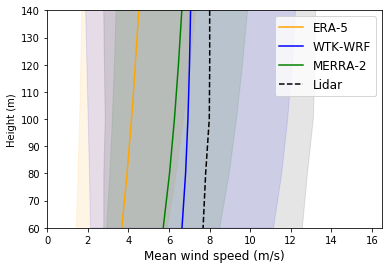

In [62]:
# Vansycle Total Mean Wind Profile

# calculation of overall mean values for each dataset
VansycleERAWSMean=VansycleERAWS.mean(axis=0)
VansycleWRFWSMean=VansycleWRFWS.mean(axis=0)
VansycleMERRAWSMean=VansycleMERRAWS.mean(axis=0)
VansycleLidarWSMean=np.nanmean(VansycleLidarWS,axis=0)

# calculation of overall standard deviation values for each dataset
VansycleERAWSStd=VansycleERAWS.std(axis=0)
VansycleWRFWSStd=VansycleWRFWS.std(axis=0)
VansycleMERRAWSStd=VansycleMERRAWS.std(axis=0)
VansycleLidarWSStd=np.nanstd(VansycleLidarWS,axis=0)

plt.figure()

plt.plot(VansycleERAWSMean,VansycleERAZ,label='ERA-5',color='orange')
plt.plot(VansycleWRFWSMean,VansycleWRFZ,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAWSMean,VansycleMERRAZ,label='MERRA-2',color='green')
plt.plot(VansycleLidarWSMean,VansycleLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(VansycleERAZ,VansycleERAWSMean-VansycleERAWSStd,VansycleERAWSMean+VansycleERAWSStd,alpha=0.1,color='orange')
plt.fill_betweenx(VansycleWRFZ,VansycleWRFWSMean-VansycleWRFWSStd,VansycleWRFWSMean+VansycleWRFWSStd,alpha=0.1,color='blue')
plt.fill_betweenx(VansycleMERRAZ,VansycleMERRAWSMean-VansycleMERRAWSStd,VansycleMERRAWSMean+VansycleMERRAWSStd,alpha=0.1,color='green')
plt.fill_betweenx(VansycleLidarZ,VansycleLidarWSMean-VansycleLidarWSStd,VansycleLidarWSMean+VansycleLidarWSStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('VansycleMeanTotal')
plt.show()

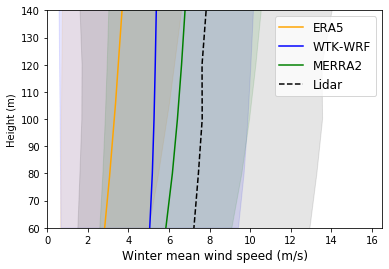

In [63]:
# Vansycle Mean Wind Profile DJF

VansycleERAWSDJFMean=VansycleERAWSDJF.mean(axis=0)
VansycleWRFWSDJFMean=VansycleWRFWSDJF.mean(axis=0)
VansycleMERRAWSDJFMean=VansycleMERRAWSDJF.mean(axis=0)
VansycleLidarWSDJFMean=np.nanmean(VansycleLidarWSDJF,axis=0)

VansycleERAWSDJFStd=VansycleERAWSDJF.std(axis=0)
VansycleWRFWSDJFStd=VansycleWRFWSDJF.std(axis=0)
VansycleMERRAWSDJFStd=VansycleMERRAWSDJF.std(axis=0)
VansycleLidarWSDJFStd=np.nanstd(VansycleLidarWSDJF,axis=0)

plt.figure()

plt.plot(VansycleERAWSDJFMean,VansycleERAZ,label='ERA5',color='orange')
plt.plot(VansycleWRFWSDJFMean,VansycleWRFZ,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAWSDJFMean,VansycleMERRAZ,label='MERRA2',color='green')
plt.plot(VansycleLidarWSDJFMean,VansycleLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(VansycleERAZ,VansycleERAWSDJFMean-VansycleERAWSDJFStd,VansycleERAWSDJFMean+VansycleERAWSDJFStd,alpha=0.1,color='orange')
plt.fill_betweenx(VansycleWRFZ,VansycleWRFWSDJFMean-VansycleWRFWSDJFStd,VansycleWRFWSDJFMean+VansycleWRFWSDJFStd,alpha=0.1,color='blue')
plt.fill_betweenx(VansycleMERRAZ,VansycleMERRAWSDJFMean-VansycleMERRAWSDJFStd,VansycleMERRAWSDJFMean+VansycleMERRAWSDJFStd,alpha=0.1,color='green')
plt.fill_betweenx(VansycleLidarZ,VansycleLidarWSDJFMean-VansycleLidarWSDJFStd,VansycleLidarWSDJFMean+VansycleLidarWSDJFStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Winter mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('VansycleMeanDJF')
plt.show()

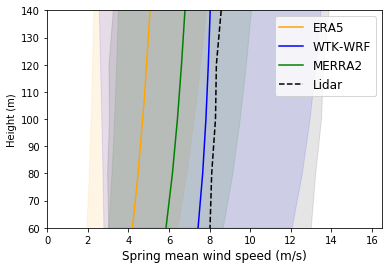

In [64]:
# Vansycle Mean Wind Profile MAM

VansycleERAWSMAMMean=VansycleERAWSMAM.mean(axis=0)
VansycleWRFWSMAMMean=VansycleWRFWSMAM.mean(axis=0)
VansycleMERRAWSMAMMean=VansycleMERRAWSMAM.mean(axis=0)
VansycleLidarWSMAMMean=np.nanmean(VansycleLidarWSMAM,axis=0)

VansycleERAWSMAMStd=VansycleERAWSMAM.std(axis=0)
VansycleWRFWSMAMStd=VansycleWRFWSMAM.std(axis=0)
VansycleMERRAWSMAMStd=VansycleMERRAWSMAM.std(axis=0)
VansycleLidarWSMAMStd=np.nanstd(VansycleLidarWSMAM,axis=0)

plt.figure()

plt.plot(VansycleERAWSMAMMean,VansycleERAZ,label='ERA5',color='orange')
plt.plot(VansycleWRFWSMAMMean,VansycleWRFZ,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAWSMAMMean,VansycleMERRAZ,label='MERRA2',color='green')
plt.plot(VansycleLidarWSMAMMean,VansycleLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(VansycleERAZ,VansycleERAWSMAMMean-VansycleERAWSMAMStd,VansycleERAWSMAMMean+VansycleERAWSMAMStd,alpha=0.1,color='orange')
plt.fill_betweenx(VansycleWRFZ,VansycleWRFWSMAMMean-VansycleWRFWSMAMStd,VansycleWRFWSMAMMean+VansycleWRFWSMAMStd,alpha=0.1,color='blue')
plt.fill_betweenx(VansycleMERRAZ,VansycleMERRAWSMAMMean-VansycleMERRAWSMAMStd,VansycleMERRAWSMAMMean+VansycleMERRAWSMAMStd,alpha=0.1,color='green')
plt.fill_betweenx(VansycleLidarZ,VansycleLidarWSMAMMean-VansycleLidarWSMAMStd,VansycleLidarWSMAMMean+VansycleLidarWSMAMStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Spring mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('VansycleMeanMAM')
plt.show()

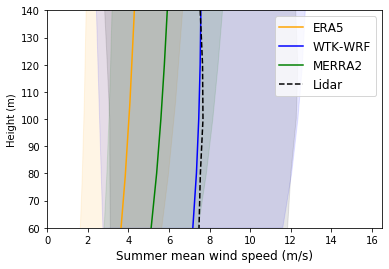

In [65]:
# Vansycle Mean Wind Profile JJA

VansycleERAWSJJAMean=VansycleERAWSJJA.mean(axis=0)
VansycleWRFWSJJAMean=VansycleWRFWSJJA.mean(axis=0)
VansycleMERRAWSJJAMean=VansycleMERRAWSJJA.mean(axis=0)
VansycleLidarWSJJAMean=np.nanmean(VansycleLidarWSJJA,axis=0)

VansycleERAWSJJAStd=VansycleERAWSJJA.std(axis=0)
VansycleWRFWSJJAStd=VansycleWRFWSJJA.std(axis=0)
VansycleMERRAWSJJAStd=VansycleMERRAWSJJA.std(axis=0)
VansycleLidarWSJJAStd=np.nanstd(VansycleLidarWSJJA,axis=0)

plt.figure()

plt.plot(VansycleERAWSJJAMean,VansycleERAZ,label='ERA5',color='orange')
plt.plot(VansycleWRFWSJJAMean,VansycleWRFZ,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAWSJJAMean,VansycleMERRAZ,label='MERRA2',color='green')
plt.plot(VansycleLidarWSJJAMean,VansycleLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(VansycleERAZ,VansycleERAWSJJAMean-VansycleERAWSJJAStd,VansycleERAWSJJAMean+VansycleERAWSJJAStd,alpha=0.1,color='orange')
plt.fill_betweenx(VansycleWRFZ,VansycleWRFWSJJAMean-VansycleWRFWSJJAStd,VansycleWRFWSJJAMean+VansycleWRFWSJJAStd,alpha=0.1,color='blue')
plt.fill_betweenx(VansycleMERRAZ,VansycleMERRAWSJJAMean-VansycleMERRAWSJJAStd,VansycleMERRAWSJJAMean+VansycleMERRAWSJJAStd,alpha=0.1,color='green')
plt.fill_betweenx(VansycleLidarZ,VansycleLidarWSJJAMean-VansycleLidarWSJJAStd,VansycleLidarWSJJAMean+VansycleLidarWSJJAStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Summer mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('VansycleMeanJJA')
plt.show()

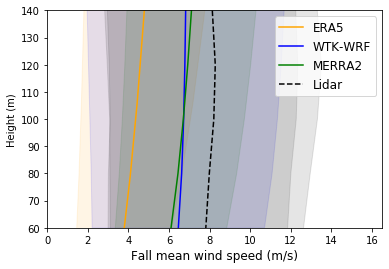

In [66]:
# Vansycle Mean Wind Profile SON

VansycleERAWSSONMean=VansycleERAWSSON.mean(axis=0)
VansycleWRFWSSONMean=VansycleWRFWSSON.mean(axis=0)
VansycleMERRAWSSONMean=VansycleMERRAWSSON.mean(axis=0)
VansycleLidarWSSONMean=np.nanmean(VansycleLidarWSSON,axis=0)

VansycleERAWSSONStd=VansycleERAWSSON.std(axis=0)
VansycleWRFWSSONStd=VansycleWRFWSSON.std(axis=0)
VansycleMERRAWSSONStd=VansycleMERRAWSSON.std(axis=0)
VansycleLidarWSSONStd=np.nanstd(VansycleLidarWSSON,axis=0)

plt.figure()

plt.plot(VansycleERAWSSONMean,VansycleERAZ,label='ERA5',color='orange')
plt.plot(VansycleWRFWSSONMean,VansycleWRFZ,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAWSSONMean,VansycleMERRAZ,label='MERRA2',color='green')
plt.plot(VansycleLidarWSSONMean,VansycleLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(VansycleERAZ,VansycleERAWSSONMean-VansycleERAWSSONStd,VansycleERAWSSONMean+VansycleERAWSSONStd,alpha=0.1,color='orange')
plt.fill_betweenx(VansycleWRFZ,VansycleWRFWSSONMean-VansycleWRFWSSONStd,VansycleWRFWSSONMean+VansycleWRFWSSONStd,alpha=0.1,color='blue')
plt.fill_betweenx(VansycleMERRAZ,VansycleMERRAWSSONMean-VansycleMERRAWSSONStd,VansycleMERRAWSSONMean+VansycleMERRAWSSONStd,alpha=0.1,color='green')
plt.fill_betweenx(VansycleLidarZ,VansycleLidarWSSONMean-VansycleLidarWSSONStd,VansycleLidarWSSONMean+VansycleLidarWSSONStd,alpha=0.1,color='black')
plt.fill_betweenx(VansycleLidarZ,VansycleLidarWSJJAMean-VansycleLidarWSJJAStd,VansycleLidarWSJJAMean+VansycleLidarWSJJAStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Fall mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('VansycleMeanSON')
plt.show()

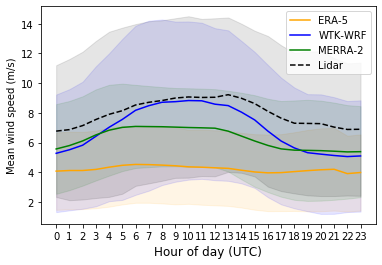

In [67]:
# Vansycle Diurnal Cycle Total

plt.plot(VansycleERAdiurnal, label='ERA-5',color='orange')
plt.plot(VansycleWRFdiurnal,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAdiurnal,label='MERRA-2',color='green')
plt.plot(VansycleLidardiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),VansycleERAdiurnal.wind_speed-VansycleERAdiurnalStd.wind_speed,VansycleERAdiurnal.wind_speed+VansycleERAdiurnalStd.wind_speed,alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),VansycleWRFdiurnal.windspeed_100m-VansycleWRFdiurnalStd.windspeed_100m,VansycleWRFdiurnal.windspeed_100m+VansycleWRFdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),VansycleMERRAdiurnal['100m wind speed']-VansycleMERRAdiurnalStd['100m wind speed'],VansycleMERRAdiurnal['100m wind speed']+VansycleMERRAdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),VansycleLidardiurnal.wind_speed-VansycleLidardiurnalStd.wind_speed,VansycleLidardiurnal.wind_speed+VansycleLidardiurnalStd.wind_speed,alpha=0.1,color='black')

plt.xlabel('Hour of day (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('VansycleDiurnalTotal')
plt.show()

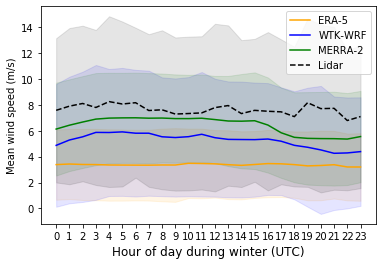

In [68]:
# Vansycle Diurnal Cycle DJF

plt.plot(VansycleERADJFdiurnal, label='ERA-5',color='orange')
plt.plot(VansycleWRFDJFdiurnal,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRADJFdiurnal,label='MERRA-2',color='green')
plt.plot(VansycleLidarDJFdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),VansycleERADJFdiurnal.wind_speed-VansycleERADJFdiurnalStd.wind_speed,VansycleERADJFdiurnal.wind_speed+VansycleERADJFdiurnalStd.wind_speed,alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),VansycleWRFDJFdiurnal.windspeed_100m-VansycleWRFDJFdiurnalStd.windspeed_100m,VansycleWRFDJFdiurnal.windspeed_100m+VansycleWRFDJFdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),VansycleMERRADJFdiurnal['100m wind speed']-VansycleMERRADJFdiurnalStd['100m wind speed'],VansycleMERRADJFdiurnal['100m wind speed']+VansycleMERRADJFdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),VansycleLidarDJFdiurnal.wind_speed-VansycleLidardiurnalDJFStd.wind_speed,VansycleLidarDJFdiurnal.wind_speed+VansycleLidardiurnalDJFStd.wind_speed,alpha=0.1,color='black')

plt.xlabel('Hour of day during winter (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('VansycleDiurnalDJF')
plt.show()

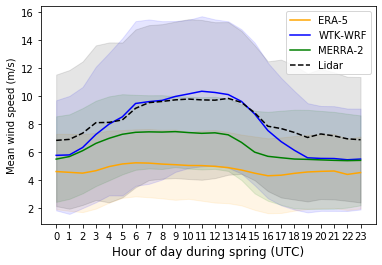

In [69]:
# Vansycle Diurnal Cycle MAM

plt.plot(VansycleERAMAMdiurnal, label='ERA-5',color='orange')
plt.plot(VansycleWRFMAMdiurnal,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAMAMdiurnal,label='MERRA-2',color='green')
plt.plot(VansycleLidarMAMdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),VansycleERAMAMdiurnal.wind_speed-VansycleERAMAMdiurnalStd.wind_speed,VansycleERAMAMdiurnal.wind_speed+VansycleERAMAMdiurnalStd.wind_speed,alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),VansycleWRFMAMdiurnal.windspeed_100m-VansycleWRFMAMdiurnalStd.windspeed_100m,VansycleWRFMAMdiurnal.windspeed_100m+VansycleWRFMAMdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),VansycleMERRAMAMdiurnal['100m wind speed']-VansycleMERRAMAMdiurnalStd['100m wind speed'],VansycleMERRAMAMdiurnal['100m wind speed']+VansycleMERRAMAMdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),VansycleLidarMAMdiurnal.wind_speed-VansycleLidardiurnalMAMStd.wind_speed,VansycleLidarMAMdiurnal.wind_speed+VansycleLidardiurnalMAMStd.wind_speed,alpha=0.1,color='black')

plt.xlabel('Hour of day during spring (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('VansycleDiurnalMAM')
plt.show()

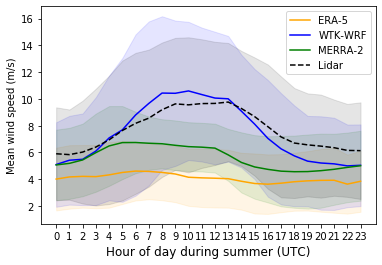

In [70]:
# Vansycle Diurnal Cycle JJA

plt.plot(VansycleERAJJAdiurnal, label='ERA-5',color='orange')
plt.plot(VansycleWRFJJAdiurnal,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRAJJAdiurnal,label='MERRA-2',color='green')
plt.plot(VansycleLidarJJAdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),VansycleERAJJAdiurnal.wind_speed-VansycleERAJJAdiurnalStd.wind_speed,VansycleERAJJAdiurnal.wind_speed+VansycleERAJJAdiurnalStd.wind_speed,alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),VansycleWRFJJAdiurnal.windspeed_100m-VansycleWRFJJAdiurnalStd.windspeed_100m,VansycleWRFJJAdiurnal.windspeed_100m+VansycleWRFJJAdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),VansycleMERRAJJAdiurnal['100m wind speed']-VansycleMERRAJJAdiurnalStd['100m wind speed'],VansycleMERRAJJAdiurnal['100m wind speed']+VansycleMERRAJJAdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),VansycleLidarJJAdiurnal.wind_speed-VansycleLidardiurnalJJAStd.wind_speed,VansycleLidarJJAdiurnal.wind_speed+VansycleLidardiurnalJJAStd.wind_speed,alpha=0.1,color='black')

plt.xlabel('Hour of day during summer (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('VansycleDiurnalJJA')
plt.show()

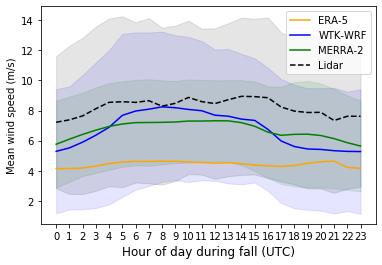

In [71]:
# Vansycle Diurnal Cycle SON

plt.plot(VansycleERASONdiurnal, label='ERA-5',color='orange')
plt.plot(VansycleWRFSONdiurnal,label='WTK-WRF',color='blue')
plt.plot(VansycleMERRASONdiurnal,label='MERRA-2',color='green')
plt.plot(VansycleLidarSONdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),VansycleWRFSONdiurnal.windspeed_100m-VansycleWRFSONdiurnalStd.windspeed_100m,VansycleWRFSONdiurnal.windspeed_100m+VansycleWRFSONdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),VansycleMERRASONdiurnal['100m wind speed']-VansycleMERRASONdiurnalStd['100m wind speed'],VansycleMERRASONdiurnal['100m wind speed']+VansycleMERRASONdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),VansycleLidarSONdiurnal.wind_speed-VansycleLidardiurnalSONStd.wind_speed,VansycleLidarSONdiurnal.wind_speed+VansycleLidardiurnalSONStd.wind_speed,alpha=0.1,color='black')

plt.xlabel('Hour of day during fall (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('VansycleDiurnalSON')
plt.show()

In [20]:
# ERA interpolation to match heights of other models + observations

# interpolation of 54 and 79 meter heights (66.5) used for comparison to 60 meters
VansycleERAIntp67=(VansycleERAWS[::,8]+VansycleERAWS[::,7])/2

# interpolation of 106 and 137 meter heights (121.5) used for comparison to 120 meters
VansycleERAIntp122=(VansycleERAWS[::,6]+VansycleERAWS[::,5])/2

In [21]:
# compilation of all comparison methods, heights into one matching dataframe with consistent time series

VansycleWS=pd.DataFrame()
VansycleWS['Time']=VansycleMERRAdf.index

VansycleWS['MERRA60']=VansycleMERRAWS[::,1]
VansycleWS['MERRA80']=VansycleMERRAWS[::,2]
VansycleWS['MERRA100']=VansycleMERRAWS[::,3]
VansycleWS['MERRA120']=VansycleMERRAWS[::,4]
VansycleWS['MERRA140']=VansycleMERRAWS[::,5]

VansycleWS['Lidar60']=VansycleLidarWS[::,1]
VansycleWS['Lidar80']=VansycleLidarWS[::,2]
VansycleWS['Lidar100']=VansycleLidarWS[::,3]
VansycleWS['Lidar120']=VansycleLidarWS[::,4]
VansycleWS['Lidar140']=VansycleLidarWS[::,5]

VansycleWS['WRF60']=VansycleWRFWS[::,0]
VansycleWS['WRF80']=VansycleWRFWS[::,1]
VansycleWS['WRF100']=VansycleWRFWS[::,2]
VansycleWS['WRF120']=VansycleWRFWS[::,3]
VansycleWS['WRF140']=VansycleWRFWS[::,4]

VansycleWS['ERA66.5']=VansycleERAIntp67
VansycleWS['ERA79']=VansycleERAWS[::,7]
VansycleWS['ERA106']=VansycleERAWS[::,6]
VansycleWS['ERA121.5']=VansycleERAIntp122
VansycleWS['ERA140']=VansycleERAWS[::,5]

VansycleZComp=[60,80,100,120,140]
# VansycleWS

VansycleWSnan=VansycleWS.dropna()

VansycleWSnanDJF=VansycleWSnan[(VansycleWSnan.Time.str.contains('-12-'))|(VansycleWSnan.Time.str.contains('-01-'))|(VansycleWSnan.Time.str.contains('-02-'))]
VansycleWSnanMAM=VansycleWSnan[(VansycleWSnan.Time.str.contains('-03-'))|(VansycleWSnan.Time.str.contains('-04-'))|(VansycleWSnan.Time.str.contains('-05-'))]
VansycleWSnanJJA=VansycleWSnan[(VansycleWSnan.Time.str.contains('-06-'))|(VansycleWSnan.Time.str.contains('-07-'))|(VansycleWSnan.Time.str.contains('-08-'))]
VansycleWSnanSON=VansycleWSnan[(VansycleWSnan.Time.str.contains('-09-'))|(VansycleWSnan.Time.str.contains('-10-'))|(VansycleWSnan.Time.str.contains('-11-'))]

In [22]:
# Vansycle Bias Total

VansycleBiasERA=np.zeros((7875,5))

VansycleBiasERA[::,0]=(VansycleWS['ERA66.5'])-(VansycleWS['Lidar60'])
VansycleBiasERA[::,1]=(VansycleWS['ERA79'])-(VansycleWS['Lidar80'])
VansycleBiasERA[::,2]=(VansycleWS['ERA106'])-(VansycleWS['Lidar100'])
VansycleBiasERA[::,3]=(VansycleWS['ERA121.5'])-(VansycleWS['Lidar120'])
VansycleBiasERA[::,4]=(VansycleWS['ERA140'])-(VansycleWS['Lidar140'])

VansycleBiasMERRA=np.zeros((7875,5))

VansycleBiasMERRA[::,0]=(VansycleWS['MERRA60'])-(VansycleWS['Lidar60'])
VansycleBiasMERRA[::,1]=(VansycleWS['MERRA80'])-(VansycleWS['Lidar80'])
VansycleBiasMERRA[::,2]=(VansycleWS['MERRA100'])-(VansycleWS['Lidar100'])
VansycleBiasMERRA[::,3]=(VansycleWS['MERRA120'])-(VansycleWS['Lidar120'])
VansycleBiasMERRA[::,4]=(VansycleWS['MERRA140'])-(VansycleWS['Lidar140'])

VansycleBiasWRF=np.zeros((7875,5))

VansycleBiasWRF[::,0]=(VansycleWS['WRF60'])-(VansycleWS['Lidar60'])
VansycleBiasWRF[::,1]=(VansycleWS['WRF80'])-(VansycleWS['Lidar80'])
VansycleBiasWRF[::,2]=(VansycleWS['WRF100'])-(VansycleWS['Lidar100'])
VansycleBiasWRF[::,3]=(VansycleWS['WRF120'])-(VansycleWS['Lidar120'])
VansycleBiasWRF[::,4]=(VansycleWS['WRF140'])-(VansycleWS['Lidar140'])

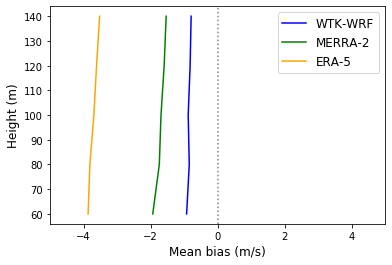

In [72]:
# Vansycle Bias Total

fig,ax=plt.subplots()
ax.plot(np.nanmean(VansycleBiasWRF,axis=0),VansycleZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(VansycleBiasMERRA,axis=0),VansycleZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(VansycleBiasERA,axis=0),VansycleZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('VansycleBiasTotal')
plt.show()


In [24]:
# Vansycle Bias DJF


VansycleBiasDJFERA=np.zeros((750,5))

VansycleBiasDJFERA[::,0]=(VansycleWSnanDJF['ERA66.5'])-(VansycleWSnanDJF['Lidar60'])
VansycleBiasDJFERA[::,1]=(VansycleWSnanDJF['ERA79'])-(VansycleWSnanDJF['Lidar80'])
VansycleBiasDJFERA[::,2]=(VansycleWSnanDJF['ERA106'])-(VansycleWSnanDJF['Lidar100'])
VansycleBiasDJFERA[::,3]=(VansycleWSnanDJF['ERA121.5'])-(VansycleWSnanDJF['Lidar120'])
VansycleBiasDJFERA[::,4]=(VansycleWSnanDJF['ERA140'])-(VansycleWSnanDJF['Lidar140'])

VansycleBiasDJFMERRA=np.zeros((750,5))

VansycleBiasDJFMERRA[::,0]=(VansycleWSnanDJF['MERRA60'])-(VansycleWSnanDJF['Lidar60'])
VansycleBiasDJFMERRA[::,1]=(VansycleWSnanDJF['MERRA80'])-(VansycleWSnanDJF['Lidar80'])
VansycleBiasDJFMERRA[::,2]=(VansycleWSnanDJF['MERRA100'])-(VansycleWSnanDJF['Lidar100'])
VansycleBiasDJFMERRA[::,3]=(VansycleWSnanDJF['MERRA120'])-(VansycleWSnanDJF['Lidar120'])
VansycleBiasDJFMERRA[::,4]=(VansycleWSnanDJF['MERRA140'])-(VansycleWSnanDJF['Lidar140'])

VansycleBiasDJFWRF=np.zeros((750,5))

VansycleBiasDJFWRF[::,0]=(VansycleWSnanDJF['WRF60'])-(VansycleWSnanDJF['Lidar60'])
VansycleBiasDJFWRF[::,1]=(VansycleWSnanDJF['WRF80'])-(VansycleWSnanDJF['Lidar80'])
VansycleBiasDJFWRF[::,2]=(VansycleWSnanDJF['WRF100'])-(VansycleWSnanDJF['Lidar100'])
VansycleBiasDJFWRF[::,3]=(VansycleWSnanDJF['WRF120'])-(VansycleWSnanDJF['Lidar120'])
VansycleBiasDJFWRF[::,4]=(VansycleWSnanDJF['WRF140'])-(VansycleWSnanDJF['Lidar140'])

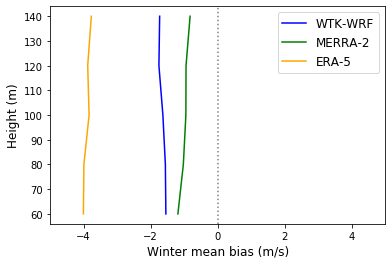

In [74]:
# Vansycle Bias DJF

fig,ax=plt.subplots()
ax.plot(np.nanmean(VansycleBiasDJFWRF,axis=0),VansycleZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(VansycleBiasDJFMERRA,axis=0),VansycleZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(VansycleBiasDJFERA,axis=0),VansycleZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Winter mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('VansycleBiasDJF')
plt.show()

In [26]:
# Vansycle Bias MAM


VansycleBiasMAMERA=np.zeros((1557,5))

VansycleBiasMAMERA[::,0]=(VansycleWSnanMAM['ERA66.5'])-(VansycleWSnanMAM['Lidar60'])
VansycleBiasMAMERA[::,1]=(VansycleWSnanMAM['ERA79'])-(VansycleWSnanMAM['Lidar80'])
VansycleBiasMAMERA[::,2]=(VansycleWSnanMAM['ERA106'])-(VansycleWSnanMAM['Lidar100'])
VansycleBiasMAMERA[::,3]=(VansycleWSnanMAM['ERA121.5'])-(VansycleWSnanMAM['Lidar120'])
VansycleBiasMAMERA[::,4]=(VansycleWSnanMAM['ERA140'])-(VansycleWSnanMAM['Lidar140'])

VansycleBiasMAMMERRA=np.zeros((1557,5))

VansycleBiasMAMMERRA[::,0]=(VansycleWSnanMAM['MERRA60'])-(VansycleWSnanMAM['Lidar60'])
VansycleBiasMAMMERRA[::,1]=(VansycleWSnanMAM['MERRA80'])-(VansycleWSnanMAM['Lidar80'])
VansycleBiasMAMMERRA[::,2]=(VansycleWSnanMAM['MERRA100'])-(VansycleWSnanMAM['Lidar100'])
VansycleBiasMAMMERRA[::,3]=(VansycleWSnanMAM['MERRA120'])-(VansycleWSnanMAM['Lidar120'])
VansycleBiasMAMMERRA[::,4]=(VansycleWSnanMAM['MERRA140'])-(VansycleWSnanMAM['Lidar140'])

VansycleBiasMAMWRF=np.zeros((1557,5))

VansycleBiasMAMWRF[::,0]=(VansycleWSnanMAM['WRF60'])-(VansycleWSnanMAM['Lidar60'])
VansycleBiasMAMWRF[::,1]=(VansycleWSnanMAM['WRF80'])-(VansycleWSnanMAM['Lidar80'])
VansycleBiasMAMWRF[::,2]=(VansycleWSnanMAM['WRF100'])-(VansycleWSnanMAM['Lidar100'])
VansycleBiasMAMWRF[::,3]=(VansycleWSnanMAM['WRF120'])-(VansycleWSnanMAM['Lidar120'])
VansycleBiasMAMWRF[::,4]=(VansycleWSnanMAM['WRF140'])-(VansycleWSnanMAM['Lidar140'])

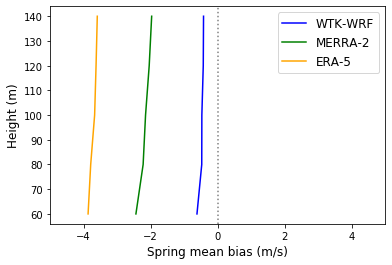

In [75]:
# Vansycle Bias MAM

fig,ax=plt.subplots()
ax.plot(np.nanmean(VansycleBiasMAMWRF,axis=0),VansycleZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(VansycleBiasMAMMERRA,axis=0),VansycleZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(VansycleBiasMAMERA,axis=0),VansycleZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Spring mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('VansycleBiasMAM')
plt.show()

In [28]:
# Vansycle Bias JJA


VansycleBiasJJAERA=np.zeros((2050,5))

VansycleBiasJJAERA[::,0]=(VansycleWSnanJJA['ERA66.5'])-(VansycleWSnanJJA['Lidar60'])
VansycleBiasJJAERA[::,1]=(VansycleWSnanJJA['ERA79'])-(VansycleWSnanJJA['Lidar80'])
VansycleBiasJJAERA[::,2]=(VansycleWSnanJJA['ERA106'])-(VansycleWSnanJJA['Lidar100'])
VansycleBiasJJAERA[::,3]=(VansycleWSnanJJA['ERA121.5'])-(VansycleWSnanJJA['Lidar120'])
VansycleBiasJJAERA[::,4]=(VansycleWSnanJJA['ERA140'])-(VansycleWSnanJJA['Lidar140'])

VansycleBiasJJAMERRA=np.zeros((2050,5))

VansycleBiasJJAMERRA[::,0]=(VansycleWSnanJJA['MERRA60'])-(VansycleWSnanJJA['Lidar60'])
VansycleBiasJJAMERRA[::,1]=(VansycleWSnanJJA['MERRA80'])-(VansycleWSnanJJA['Lidar80'])
VansycleBiasJJAMERRA[::,2]=(VansycleWSnanJJA['MERRA100'])-(VansycleWSnanJJA['Lidar100'])
VansycleBiasJJAMERRA[::,3]=(VansycleWSnanJJA['MERRA120'])-(VansycleWSnanJJA['Lidar120'])
VansycleBiasJJAMERRA[::,4]=(VansycleWSnanJJA['MERRA140'])-(VansycleWSnanJJA['Lidar140'])

VansycleBiasJJAWRF=np.zeros((2050,5))

VansycleBiasJJAWRF[::,0]=(VansycleWSnanJJA['WRF60'])-(VansycleWSnanJJA['Lidar60'])
VansycleBiasJJAWRF[::,1]=(VansycleWSnanJJA['WRF80'])-(VansycleWSnanJJA['Lidar80'])
VansycleBiasJJAWRF[::,2]=(VansycleWSnanJJA['WRF100'])-(VansycleWSnanJJA['Lidar100'])
VansycleBiasJJAWRF[::,3]=(VansycleWSnanJJA['WRF120'])-(VansycleWSnanJJA['Lidar120'])
VansycleBiasJJAWRF[::,4]=(VansycleWSnanJJA['WRF140'])-(VansycleWSnanJJA['Lidar140'])

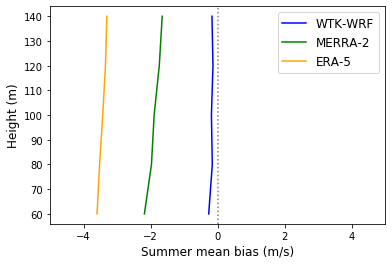

In [76]:
# Vansycle Bias JJA

fig,ax=plt.subplots()
ax.plot(np.nanmean(VansycleBiasJJAWRF,axis=0),VansycleZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(VansycleBiasJJAMERRA,axis=0),VansycleZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(VansycleBiasJJAERA,axis=0),VansycleZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Summer mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('VansycleBiasJJA')
plt.show()

In [30]:
# Vansycle Bias SON


VansycleBiasSONERA=np.zeros((1577,5))

VansycleBiasSONERA[::,0]=(VansycleWSnanSON['ERA66.5'])-(VansycleWSnanSON['Lidar60'])
VansycleBiasSONERA[::,1]=(VansycleWSnanSON['ERA79'])-(VansycleWSnanSON['Lidar80'])
VansycleBiasSONERA[::,2]=(VansycleWSnanSON['ERA106'])-(VansycleWSnanSON['Lidar100'])
VansycleBiasSONERA[::,3]=(VansycleWSnanSON['ERA121.5'])-(VansycleWSnanSON['Lidar120'])
VansycleBiasSONERA[::,4]=(VansycleWSnanSON['ERA140'])-(VansycleWSnanSON['Lidar140'])

VansycleBiasSONMERRA=np.zeros((1577,5))

VansycleBiasSONMERRA[::,0]=(VansycleWSnanSON['MERRA60'])-(VansycleWSnanSON['Lidar60'])
VansycleBiasSONMERRA[::,1]=(VansycleWSnanSON['MERRA80'])-(VansycleWSnanSON['Lidar80'])
VansycleBiasSONMERRA[::,2]=(VansycleWSnanSON['MERRA100'])-(VansycleWSnanSON['Lidar100'])
VansycleBiasSONMERRA[::,3]=(VansycleWSnanSON['MERRA120'])-(VansycleWSnanSON['Lidar120'])
VansycleBiasSONMERRA[::,4]=(VansycleWSnanSON['MERRA140'])-(VansycleWSnanSON['Lidar140'])

VansycleBiasSONWRF=np.zeros((1577,5))

VansycleBiasSONWRF[::,0]=(VansycleWSnanSON['WRF60'])-(VansycleWSnanSON['Lidar60'])
VansycleBiasSONWRF[::,1]=(VansycleWSnanSON['WRF80'])-(VansycleWSnanSON['Lidar80'])
VansycleBiasSONWRF[::,2]=(VansycleWSnanSON['WRF100'])-(VansycleWSnanSON['Lidar100'])
VansycleBiasSONWRF[::,3]=(VansycleWSnanSON['WRF120'])-(VansycleWSnanSON['Lidar120'])
VansycleBiasSONWRF[::,4]=(VansycleWSnanSON['WRF140'])-(VansycleWSnanSON['Lidar140'])

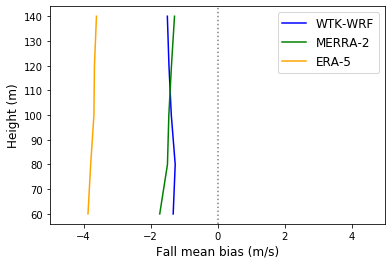

In [77]:
# Vansycle Bias SON

fig,ax=plt.subplots()
ax.plot(np.nanmean(VansycleBiasSONWRF,axis=0),VansycleZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(VansycleBiasSONMERRA,axis=0),VansycleZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(VansycleBiasSONERA,axis=0),VansycleZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Fall mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('VansycleBiasSON')
plt.show()

In [32]:
# Vansycle CC Total

VansycleR2ERA=np.zeros(5)
VansycleR2ERA[0]=np.power((np.corrcoef(VansycleWSnan['Lidar60'],VansycleWSnan['ERA66.5'])[0,1]),2)
VansycleR2ERA[1]=np.power((np.corrcoef(VansycleWSnan['Lidar80'],VansycleWSnan['ERA79'])[0,1]),2)
VansycleR2ERA[2]=np.power((np.corrcoef(VansycleWSnan['Lidar100'],VansycleWSnan['ERA106'])[0,1]),2)
VansycleR2ERA[3]=np.power((np.corrcoef(VansycleWSnan['Lidar120'],VansycleWSnan['ERA121.5'])[0,1]),2)
VansycleR2ERA[4]=np.power((np.corrcoef(VansycleWSnan['Lidar140'],VansycleWSnan['ERA140'])[0,1]),2)

VansycleR2MERRA=np.zeros(5)
VansycleR2MERRA[0]=np.power((np.corrcoef(VansycleWSnan['Lidar60'],VansycleWSnan['MERRA60'])[0,1]),2)
VansycleR2MERRA[1]=np.power((np.corrcoef(VansycleWSnan['Lidar80'],VansycleWSnan['MERRA80'])[0,1]),2)
VansycleR2MERRA[2]=np.power((np.corrcoef(VansycleWSnan['Lidar100'],VansycleWSnan['MERRA100'])[0,1]),2)
VansycleR2MERRA[3]=np.power((np.corrcoef(VansycleWSnan['Lidar120'],VansycleWSnan['MERRA120'])[0,1]),2)
VansycleR2MERRA[4]=np.power((np.corrcoef(VansycleWSnan['Lidar140'],VansycleWSnan['MERRA140'])[0,1]),2)

VansycleR2WRF=np.zeros(5)
VansycleR2WRF[0]=np.power((np.corrcoef(VansycleWSnan['Lidar60'],VansycleWSnan['WRF60'])[0,1]),2)
VansycleR2WRF[1]=np.power((np.corrcoef(VansycleWSnan['Lidar80'],VansycleWSnan['WRF80'])[0,1]),2)
VansycleR2WRF[2]=np.power((np.corrcoef(VansycleWSnan['Lidar100'],VansycleWSnan['WRF100'])[0,1]),2)
VansycleR2WRF[3]=np.power((np.corrcoef(VansycleWSnan['Lidar120'],VansycleWSnan['WRF120'])[0,1]),2)
VansycleR2WRF[4]=np.power((np.corrcoef(VansycleWSnan['Lidar140'],VansycleWSnan['WRF140'])[0,1]),2)

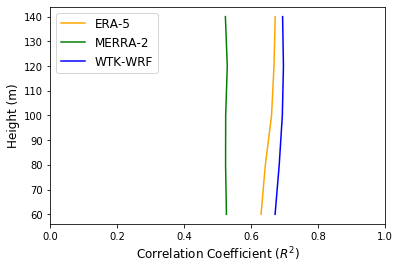

In [78]:
# Vansycle CC Total

fig,ax=plt.subplots()

ax.plot(VansycleR2ERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleR2MERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleR2WRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('VansycleR2Total')
plt.show()

In [79]:
# Vansycle CC DJF

VansycleR2DJFERA=np.zeros(5)
VansycleR2DJFERA[0]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['ERA66.5'])[0,1]),2)
VansycleR2DJFERA[1]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['ERA79'])[0,1]),2)
VansycleR2DJFERA[2]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['ERA106'])[0,1]),2)
VansycleR2DJFERA[3]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['ERA121.5'])[0,1]),2)
VansycleR2DJFERA[4]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['ERA140'])[0,1]),2)

VansycleR2DJFMERRA=np.zeros(5)
VansycleR2DJFMERRA[0]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['MERRA60'])[0,1]),2)
VansycleR2DJFMERRA[1]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['MERRA80'])[0,1]),2)
VansycleR2DJFMERRA[2]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['MERRA100'])[0,1]),2)
VansycleR2DJFMERRA[3]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['MERRA120'])[0,1]),2)
VansycleR2DJFMERRA[4]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['MERRA140'])[0,1]),2)

VansycleR2DJFWRF=np.zeros(5)
VansycleR2DJFWRF[0]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['WRF60'])[0,1]),2)
VansycleR2DJFWRF[1]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['WRF80'])[0,1]),2)
VansycleR2DJFWRF[2]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['WRF100'])[0,1]),2)
VansycleR2DJFWRF[3]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['WRF120'])[0,1]),2)
VansycleR2DJFWRF[4]=np.power((np.corrcoef(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['WRF140'])[0,1]),2)

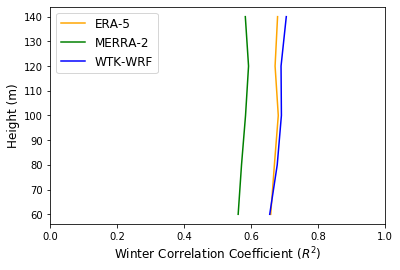

In [81]:
# Vansycle CC DJF

fig,ax=plt.subplots()

ax.plot(VansycleR2DJFERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleR2DJFMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleR2DJFWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Winter Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('VansycleR2DJF')
plt.show()

In [36]:
# Vansycle CC MAM

VansycleR2MAMERA=np.zeros(5)
VansycleR2MAMERA[0]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['ERA66.5'])[0,1]),2)
VansycleR2MAMERA[1]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['ERA79'])[0,1]),2)
VansycleR2MAMERA[2]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['ERA106'])[0,1]),2)
VansycleR2MAMERA[3]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['ERA121.5'])[0,1]),2)
VansycleR2MAMERA[4]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['ERA140'])[0,1]),2)

VansycleR2MAMMERRA=np.zeros(5)
VansycleR2MAMMERRA[0]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['MERRA60'])[0,1]),2)
VansycleR2MAMMERRA[1]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['MERRA80'])[0,1]),2)
VansycleR2MAMMERRA[2]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['MERRA100'])[0,1]),2)
VansycleR2MAMMERRA[3]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['MERRA120'])[0,1]),2)
VansycleR2MAMMERRA[4]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['MERRA140'])[0,1]),2)

VansycleR2MAMWRF=np.zeros(5)
VansycleR2MAMWRF[0]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['WRF60'])[0,1]),2)
VansycleR2MAMWRF[1]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['WRF80'])[0,1]),2)
VansycleR2MAMWRF[2]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['WRF100'])[0,1]),2)
VansycleR2MAMWRF[3]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['WRF120'])[0,1]),2)
VansycleR2MAMWRF[4]=np.power((np.corrcoef(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['WRF140'])[0,1]),2)

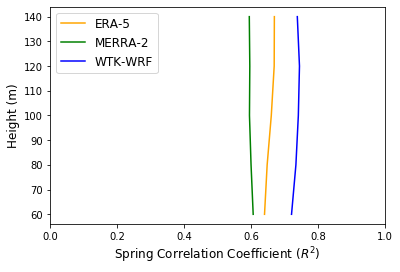

In [82]:
# Vansycle CC MAM

fig,ax=plt.subplots()

ax.plot(VansycleR2MAMERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleR2MAMMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleR2MAMWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Spring Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('VansycleR2MAM')
plt.show()

In [38]:
# Vansycle CC JJA

VansycleR2JJAERA=np.zeros(5)
VansycleR2JJAERA[0]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['ERA66.5'])[0,1]),2)
VansycleR2JJAERA[1]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['ERA79'])[0,1]),2)
VansycleR2JJAERA[2]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['ERA106'])[0,1]),2)
VansycleR2JJAERA[3]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['ERA121.5'])[0,1]),2)
VansycleR2JJAERA[4]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['ERA140'])[0,1]),2)

VansycleR2JJAMERRA=np.zeros(5)
VansycleR2JJAMERRA[0]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['MERRA60'])[0,1]),2)
VansycleR2JJAMERRA[1]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['MERRA80'])[0,1]),2)
VansycleR2JJAMERRA[2]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['MERRA100'])[0,1]),2)
VansycleR2JJAMERRA[3]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['MERRA120'])[0,1]),2)
VansycleR2JJAMERRA[4]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['MERRA140'])[0,1]),2)

VansycleR2JJAWRF=np.zeros(5)
VansycleR2JJAWRF[0]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['WRF60'])[0,1]),2)
VansycleR2JJAWRF[1]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['WRF80'])[0,1]),2)
VansycleR2JJAWRF[2]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['WRF100'])[0,1]),2)
VansycleR2JJAWRF[3]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['WRF120'])[0,1]),2)
VansycleR2JJAWRF[4]=np.power((np.corrcoef(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['WRF140'])[0,1]),2)

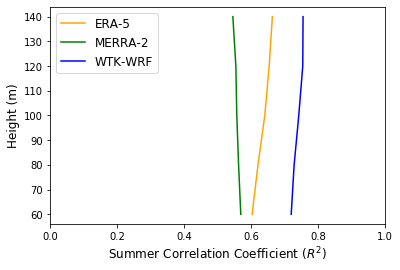

In [83]:
# Vansycle CC JJA

fig,ax=plt.subplots()

ax.plot(VansycleR2JJAERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleR2JJAMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleR2JJAWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Summer Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('VansycleR2JJA')
plt.show()

In [40]:
# Vansycle CC SON

VansycleR2SONERA=np.zeros(5)
VansycleR2SONERA[0]=np.power((np.corrcoef(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['ERA66.5'])[0,1]),2)
VansycleR2SONERA[1]=np.power((np.corrcoef(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['ERA79'])[0,1]),2)
VansycleR2SONERA[2]=np.power((np.corrcoef(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['ERA106'])[0,1]),2)
VansycleR2SONERA[3]=np.power((np.corrcoef(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['ERA121.5'])[0,1]),2)
VansycleR2SONERA[4]=np.power((np.corrcoef(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['ERA140'])[0,1]),2)

VansycleR2SONMERRA=np.zeros(5)
VansycleR2SONMERRA[0]=np.power((np.corrcoef(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['MERRA60'])[0,1]),2)
VansycleR2SONMERRA[1]=np.power((np.corrcoef(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['MERRA80'])[0,1]),2)
VansycleR2SONMERRA[2]=np.power((np.corrcoef(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['MERRA100'])[0,1]),2)
VansycleR2SONMERRA[3]=np.power((np.corrcoef(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['MERRA120'])[0,1]),2)
VansycleR2SONMERRA[4]=np.power((np.corrcoef(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['MERRA140'])[0,1]),2)

VansycleR2SONWRF=np.zeros(5)
VansycleR2SONWRF[0]=np.power((np.corrcoef(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['WRF60'])[0,1]),2)
VansycleR2SONWRF[1]=np.power((np.corrcoef(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['WRF80'])[0,1]),2)
VansycleR2SONWRF[2]=np.power((np.corrcoef(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['WRF100'])[0,1]),2)
VansycleR2SONWRF[3]=np.power((np.corrcoef(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['WRF120'])[0,1]),2)
VansycleR2SONWRF[4]=np.power((np.corrcoef(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['WRF140'])[0,1]),2)

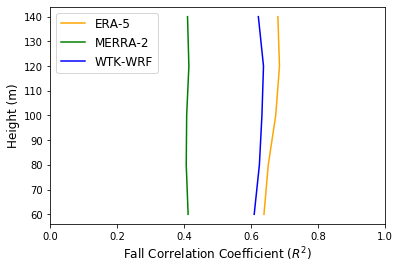

In [84]:
# Vansycle CC SON

fig,ax=plt.subplots()

ax.plot(VansycleR2SONERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleR2SONMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleR2SONWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Fall Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('VansycleR2SON')
plt.show()

In [42]:
# Vansycle cRMSE Total

VansycleCRMSEERA=np.zeros(5)
VansycleCRMSEERA[0]=(sm.centered_rms_dev(VansycleWSnan['Lidar60'],VansycleWSnan['ERA66.5']))
VansycleCRMSEERA[1]=(sm.centered_rms_dev(VansycleWSnan['Lidar80'],VansycleWSnan['ERA79']))
VansycleCRMSEERA[2]=(sm.centered_rms_dev(VansycleWSnan['Lidar100'],VansycleWSnan['ERA106']))
VansycleCRMSEERA[3]=(sm.centered_rms_dev(VansycleWSnan['Lidar120'],VansycleWSnan['ERA121.5']))
VansycleCRMSEERA[4]=(sm.centered_rms_dev(VansycleWSnan['Lidar140'],VansycleWSnan['ERA140']))

VansycleCRMSEMERRA=np.zeros(5)
VansycleCRMSEMERRA[0]=(sm.centered_rms_dev(VansycleWSnan['Lidar60'],VansycleWSnan['MERRA60']))
VansycleCRMSEMERRA[1]=(sm.centered_rms_dev(VansycleWSnan['Lidar80'],VansycleWSnan['MERRA80']))
VansycleCRMSEMERRA[2]=(sm.centered_rms_dev(VansycleWSnan['Lidar100'],VansycleWSnan['MERRA100']))
VansycleCRMSEMERRA[3]=(sm.centered_rms_dev(VansycleWSnan['Lidar120'],VansycleWSnan['MERRA120']))
VansycleCRMSEMERRA[4]=(sm.centered_rms_dev(VansycleWSnan['Lidar140'],VansycleWSnan['MERRA140']))

VansycleCRMSEWRF=np.zeros(5)
VansycleCRMSEWRF[0]=(sm.centered_rms_dev(VansycleWSnan['Lidar60'],VansycleWSnan['WRF60']))
VansycleCRMSEWRF[1]=(sm.centered_rms_dev(VansycleWSnan['Lidar80'],VansycleWSnan['WRF80']))
VansycleCRMSEWRF[2]=(sm.centered_rms_dev(VansycleWSnan['Lidar100'],VansycleWSnan['WRF100']))
VansycleCRMSEWRF[3]=(sm.centered_rms_dev(VansycleWSnan['Lidar120'],VansycleWSnan['WRF120']))
VansycleCRMSEWRF[4]=(sm.centered_rms_dev(VansycleWSnan['Lidar140'],VansycleWSnan['WRF140']))

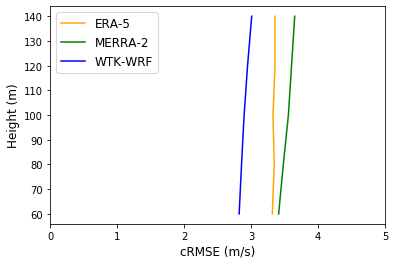

In [85]:
# Vansycle cRMSE Total

fig,ax=plt.subplots()
ax.plot(VansycleCRMSEERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleCRMSEMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleCRMSEWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleCRMSETotal')
plt.show()

In [44]:
# Vansycle cRMSE DJF

VansycleCRMSEDJFERA=np.zeros(5)
VansycleCRMSEDJFERA[0]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['ERA66.5']))
VansycleCRMSEDJFERA[1]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['ERA79']))
VansycleCRMSEDJFERA[2]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['ERA106']))
VansycleCRMSEDJFERA[3]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['ERA121.5']))
VansycleCRMSEDJFERA[4]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['ERA140']))

VansycleCRMSEDJFMERRA=np.zeros(5)
VansycleCRMSEDJFMERRA[0]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['MERRA60']))
VansycleCRMSEDJFMERRA[1]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['MERRA80']))
VansycleCRMSEDJFMERRA[2]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['MERRA100']))
VansycleCRMSEDJFMERRA[3]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['MERRA120']))
VansycleCRMSEDJFMERRA[4]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['MERRA140']))

VansycleCRMSEDJFWRF=np.zeros(5)
VansycleCRMSEDJFWRF[0]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['WRF60']))
VansycleCRMSEDJFWRF[1]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['WRF80']))
VansycleCRMSEDJFWRF[2]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['WRF100']))
VansycleCRMSEDJFWRF[3]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['WRF120']))
VansycleCRMSEDJFWRF[4]=(sm.centered_rms_dev(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['WRF140']))

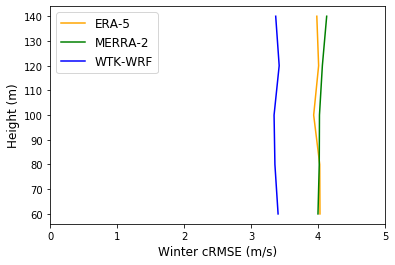

In [86]:
# Vansycle cRMSE DJF

fig,ax=plt.subplots()
ax.plot(VansycleCRMSEDJFERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleCRMSEDJFMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleCRMSEDJFWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Winter cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleCRMSEDJF')
plt.show()

In [46]:
# Vansycle cRMSE MAM

VansycleCRMSEMAMERA=np.zeros(5)
VansycleCRMSEMAMERA[0]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['ERA66.5']))
VansycleCRMSEMAMERA[1]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['ERA79']))
VansycleCRMSEMAMERA[2]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['ERA106']))
VansycleCRMSEMAMERA[3]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['ERA121.5']))
VansycleCRMSEMAMERA[4]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['ERA140']))

VansycleCRMSEMAMMERRA=np.zeros(5)
VansycleCRMSEMAMMERRA[0]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['MERRA60']))
VansycleCRMSEMAMMERRA[1]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['MERRA80']))
VansycleCRMSEMAMMERRA[2]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['MERRA100']))
VansycleCRMSEMAMMERRA[3]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['MERRA120']))
VansycleCRMSEMAMMERRA[4]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['MERRA140']))

VansycleCRMSEMAMWRF=np.zeros(5)
VansycleCRMSEMAMWRF[0]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['WRF60']))
VansycleCRMSEMAMWRF[1]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['WRF80']))
VansycleCRMSEMAMWRF[2]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['WRF100']))
VansycleCRMSEMAMWRF[3]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['WRF120']))
VansycleCRMSEMAMWRF[4]=(sm.centered_rms_dev(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['WRF140']))

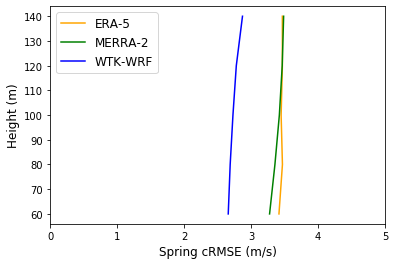

In [87]:
# Vansycle cRMSE MAM

fig,ax=plt.subplots()
ax.plot(VansycleCRMSEMAMERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleCRMSEMAMMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleCRMSEMAMWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Spring cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleCRMSEMAM')
plt.show()

In [48]:
# Vansycle cRMSE JJA

VansycleCRMSEJJAERA=np.zeros(5)
VansycleCRMSEJJAERA[0]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['ERA66.5']))
VansycleCRMSEJJAERA[1]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['ERA79']))
VansycleCRMSEJJAERA[2]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['ERA106']))
VansycleCRMSEJJAERA[3]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['ERA121.5']))
VansycleCRMSEJJAERA[4]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['ERA140']))

VansycleCRMSEJJAMERRA=np.zeros(5)
VansycleCRMSEJJAMERRA[0]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['MERRA60']))
VansycleCRMSEJJAMERRA[1]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['MERRA80']))
VansycleCRMSEJJAMERRA[2]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['MERRA100']))
VansycleCRMSEJJAMERRA[3]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['MERRA120']))
VansycleCRMSEJJAMERRA[4]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['MERRA140']))

VansycleCRMSEJJAWRF=np.zeros(5)
VansycleCRMSEJJAWRF[0]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['WRF60']))
VansycleCRMSEJJAWRF[1]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['WRF80']))
VansycleCRMSEJJAWRF[2]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['WRF100']))
VansycleCRMSEJJAWRF[3]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['WRF120']))
VansycleCRMSEJJAWRF[4]=(sm.centered_rms_dev(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['WRF140']))

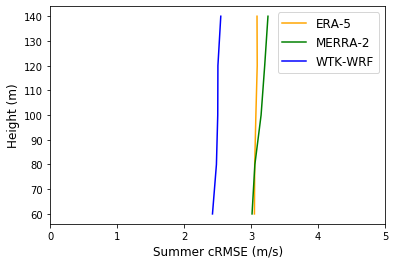

In [88]:
# Vansycle cRMSE JJA

fig,ax=plt.subplots()
ax.plot(VansycleCRMSEJJAERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleCRMSEJJAMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleCRMSEJJAWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Summer cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleCRMSEJJA')
plt.show()

In [50]:
# Vansycle cRMSE SON

VansycleCRMSESONERA=np.zeros(5)
VansycleCRMSESONERA[0]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['ERA66.5']))
VansycleCRMSESONERA[1]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['ERA79']))
VansycleCRMSESONERA[2]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['ERA106']))
VansycleCRMSESONERA[3]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['ERA121.5']))
VansycleCRMSESONERA[4]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['ERA140']))

VansycleCRMSESONMERRA=np.zeros(5)
VansycleCRMSESONMERRA[0]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['MERRA60']))
VansycleCRMSESONMERRA[1]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['MERRA80']))
VansycleCRMSESONMERRA[2]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['MERRA100']))
VansycleCRMSESONMERRA[3]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['MERRA120']))
VansycleCRMSESONMERRA[4]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['MERRA140']))

VansycleCRMSESONWRF=np.zeros(5)
VansycleCRMSESONWRF[0]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['WRF60']))
VansycleCRMSESONWRF[1]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['WRF80']))
VansycleCRMSESONWRF[2]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['WRF100']))
VansycleCRMSESONWRF[3]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['WRF120']))
VansycleCRMSESONWRF[4]=(sm.centered_rms_dev(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['WRF140']))

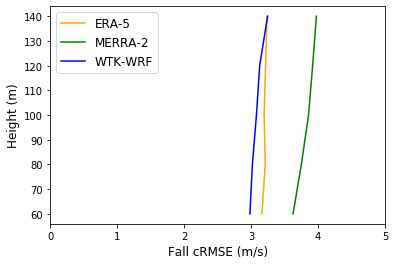

In [90]:
# Vansycle cRMSE SON

fig,ax=plt.subplots()
ax.plot(VansycleCRMSESONERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleCRMSESONMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleCRMSESONWRF,VansycleZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Fall cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleCRMSESON')
plt.show()

In [52]:
# Vansycle EMD Total

VansycleEMDERA=np.zeros(5)
VansycleEMDERA[0]=(wasserstein_distance(VansycleWSnan['Lidar60'],VansycleWSnan['ERA66.5']))
VansycleEMDERA[1]=(wasserstein_distance(VansycleWSnan['Lidar80'],VansycleWSnan['ERA79']))
VansycleEMDERA[2]=(wasserstein_distance(VansycleWSnan['Lidar100'],VansycleWSnan['ERA106']))
VansycleEMDERA[3]=(wasserstein_distance(VansycleWSnan['Lidar120'],VansycleWSnan['ERA121.5']))
VansycleEMDERA[4]=(wasserstein_distance(VansycleWSnan['Lidar140'],VansycleWSnan['ERA140']))

VansycleEMDMERRA=np.zeros(5)
VansycleEMDMERRA[0]=(wasserstein_distance(VansycleWSnan['Lidar60'],VansycleWSnan['MERRA60']))
VansycleEMDMERRA[1]=(wasserstein_distance(VansycleWSnan['Lidar80'],VansycleWSnan['MERRA80']))
VansycleEMDMERRA[2]=(wasserstein_distance(VansycleWSnan['Lidar100'],VansycleWSnan['MERRA100']))
VansycleEMDMERRA[3]=(wasserstein_distance(VansycleWSnan['Lidar120'],VansycleWSnan['MERRA120']))
VansycleEMDMERRA[4]=(wasserstein_distance(VansycleWSnan['Lidar140'],VansycleWSnan['MERRA140']))

VansycleEMDWRF=np.zeros(5)
VansycleEMDWRF[0]=(wasserstein_distance(VansycleWSnan['Lidar60'],VansycleWSnan['WRF60']))
VansycleEMDWRF[1]=(wasserstein_distance(VansycleWSnan['Lidar80'],VansycleWSnan['WRF80']))
VansycleEMDWRF[2]=(wasserstein_distance(VansycleWSnan['Lidar100'],VansycleWSnan['WRF100']))
VansycleEMDWRF[3]=(wasserstein_distance(VansycleWSnan['Lidar120'],VansycleWSnan['WRF120']))
VansycleEMDWRF[4]=(wasserstein_distance(VansycleWSnan['Lidar140'],VansycleWSnan['WRF140']))

(0, 5)

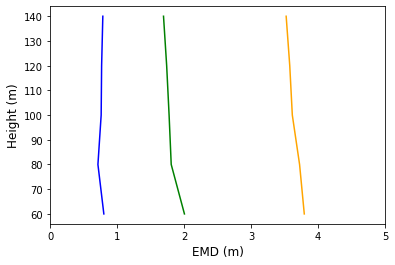

In [91]:
# Vansycle EMD Total

fig,ax=plt.subplots()
ax.plot(VansycleEMDERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleEMDMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleEMDWRF,VansycleZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleEMDTotal')

In [54]:
# Vansycle EMD DJF

VansycleEMDDJFERA=np.zeros(5)
VansycleEMDDJFERA[0]=(wasserstein_distance(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['ERA66.5']))
VansycleEMDDJFERA[1]=(wasserstein_distance(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['ERA79']))
VansycleEMDDJFERA[2]=(wasserstein_distance(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['ERA106']))
VansycleEMDDJFERA[3]=(wasserstein_distance(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['ERA121.5']))
VansycleEMDDJFERA[4]=(wasserstein_distance(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['ERA140']))

VansycleEMDDJFMERRA=np.zeros(5)
VansycleEMDDJFMERRA[0]=(wasserstein_distance(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['MERRA60']))
VansycleEMDDJFMERRA[1]=(wasserstein_distance(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['MERRA80']))
VansycleEMDDJFMERRA[2]=(wasserstein_distance(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['MERRA100']))
VansycleEMDDJFMERRA[3]=(wasserstein_distance(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['MERRA120']))
VansycleEMDDJFMERRA[4]=(wasserstein_distance(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['MERRA140']))

VansycleEMDDJFWRF=np.zeros(5)
VansycleEMDDJFWRF[0]=(wasserstein_distance(VansycleWSnanDJF['Lidar60'],VansycleWSnanDJF['WRF60']))
VansycleEMDDJFWRF[1]=(wasserstein_distance(VansycleWSnanDJF['Lidar80'],VansycleWSnanDJF['WRF80']))
VansycleEMDDJFWRF[2]=(wasserstein_distance(VansycleWSnanDJF['Lidar100'],VansycleWSnanDJF['WRF100']))
VansycleEMDDJFWRF[3]=(wasserstein_distance(VansycleWSnanDJF['Lidar120'],VansycleWSnanDJF['WRF120']))
VansycleEMDDJFWRF[4]=(wasserstein_distance(VansycleWSnanDJF['Lidar140'],VansycleWSnanDJF['WRF140']))

(0, 5)

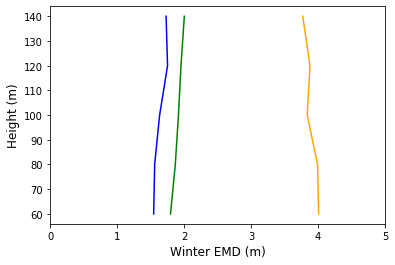

In [92]:
# Vansycle EMD DJF 

fig,ax=plt.subplots()
ax.plot(VansycleEMDDJFERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleEMDDJFMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleEMDDJFWRF,VansycleZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Winter EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleEMDDJF')

In [56]:
# Vansycle EMD MAM

VansycleEMDMAMERA=np.zeros(5)
VansycleEMDMAMERA[0]=(wasserstein_distance(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['ERA66.5']))
VansycleEMDMAMERA[1]=(wasserstein_distance(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['ERA79']))
VansycleEMDMAMERA[2]=(wasserstein_distance(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['ERA106']))
VansycleEMDMAMERA[3]=(wasserstein_distance(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['ERA121.5']))
VansycleEMDMAMERA[4]=(wasserstein_distance(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['ERA140']))

VansycleEMDMAMMERRA=np.zeros(5)
VansycleEMDMAMMERRA[0]=(wasserstein_distance(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['MERRA60']))
VansycleEMDMAMMERRA[1]=(wasserstein_distance(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['MERRA80']))
VansycleEMDMAMMERRA[2]=(wasserstein_distance(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['MERRA100']))
VansycleEMDMAMMERRA[3]=(wasserstein_distance(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['MERRA120']))
VansycleEMDMAMMERRA[4]=(wasserstein_distance(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['MERRA140']))

VansycleEMDMAMWRF=np.zeros(5)
VansycleEMDMAMWRF[0]=(wasserstein_distance(VansycleWSnanMAM['Lidar60'],VansycleWSnanMAM['WRF60']))
VansycleEMDMAMWRF[1]=(wasserstein_distance(VansycleWSnanMAM['Lidar80'],VansycleWSnanMAM['WRF80']))
VansycleEMDMAMWRF[2]=(wasserstein_distance(VansycleWSnanMAM['Lidar100'],VansycleWSnanMAM['WRF100']))
VansycleEMDMAMWRF[3]=(wasserstein_distance(VansycleWSnanMAM['Lidar120'],VansycleWSnanMAM['WRF120']))
VansycleEMDMAMWRF[4]=(wasserstein_distance(VansycleWSnanMAM['Lidar140'],VansycleWSnanMAM['WRF140']))

(0, 5)

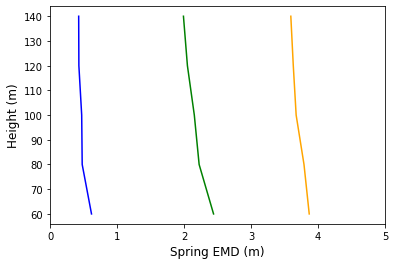

In [93]:
# Vansycle EMD MAM 

fig,ax=plt.subplots()
ax.plot(VansycleEMDMAMERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleEMDMAMMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleEMDMAMWRF,VansycleZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Spring EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleEMDMAM')

In [58]:
# Vansycle EMD JJA

VansycleEMDJJAERA=np.zeros(5)
VansycleEMDJJAERA[0]=(wasserstein_distance(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['ERA66.5']))
VansycleEMDJJAERA[1]=(wasserstein_distance(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['ERA79']))
VansycleEMDJJAERA[2]=(wasserstein_distance(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['ERA106']))
VansycleEMDJJAERA[3]=(wasserstein_distance(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['ERA121.5']))
VansycleEMDJJAERA[4]=(wasserstein_distance(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['ERA140']))

VansycleEMDJJAMERRA=np.zeros(5)
VansycleEMDJJAMERRA[0]=(wasserstein_distance(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['MERRA60']))
VansycleEMDJJAMERRA[1]=(wasserstein_distance(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['MERRA80']))
VansycleEMDJJAMERRA[2]=(wasserstein_distance(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['MERRA100']))
VansycleEMDJJAMERRA[3]=(wasserstein_distance(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['MERRA120']))
VansycleEMDJJAMERRA[4]=(wasserstein_distance(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['MERRA140']))

VansycleEMDJJAWRF=np.zeros(5)
VansycleEMDJJAWRF[0]=(wasserstein_distance(VansycleWSnanJJA['Lidar60'],VansycleWSnanJJA['WRF60']))
VansycleEMDJJAWRF[1]=(wasserstein_distance(VansycleWSnanJJA['Lidar80'],VansycleWSnanJJA['WRF80']))
VansycleEMDJJAWRF[2]=(wasserstein_distance(VansycleWSnanJJA['Lidar100'],VansycleWSnanJJA['WRF100']))
VansycleEMDJJAWRF[3]=(wasserstein_distance(VansycleWSnanJJA['Lidar120'],VansycleWSnanJJA['WRF120']))
VansycleEMDJJAWRF[4]=(wasserstein_distance(VansycleWSnanJJA['Lidar140'],VansycleWSnanJJA['WRF140']))

(0, 5)

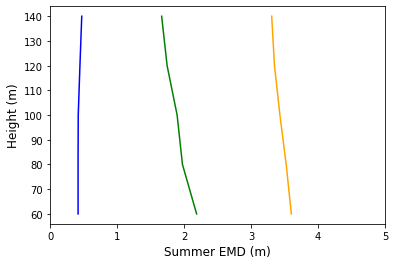

In [94]:
# Vansycle EMD JJA 

fig,ax=plt.subplots()
ax.plot(VansycleEMDJJAERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleEMDJJAMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleEMDJJAWRF,VansycleZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Summer EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleEMDJJA')

In [60]:
# Vansycle EMD SON

VansycleEMDSONERA=np.zeros(5)
VansycleEMDSONERA[0]=(wasserstein_distance(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['ERA66.5']))
VansycleEMDSONERA[1]=(wasserstein_distance(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['ERA79']))
VansycleEMDSONERA[2]=(wasserstein_distance(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['ERA106']))
VansycleEMDSONERA[3]=(wasserstein_distance(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['ERA121.5']))
VansycleEMDSONERA[4]=(wasserstein_distance(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['ERA140']))

VansycleEMDSONMERRA=np.zeros(5)
VansycleEMDSONMERRA[0]=(wasserstein_distance(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['MERRA60']))
VansycleEMDSONMERRA[1]=(wasserstein_distance(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['MERRA80']))
VansycleEMDSONMERRA[2]=(wasserstein_distance(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['MERRA100']))
VansycleEMDSONMERRA[3]=(wasserstein_distance(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['MERRA120']))
VansycleEMDSONMERRA[4]=(wasserstein_distance(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['MERRA140']))

VansycleEMDSONWRF=np.zeros(5)
VansycleEMDSONWRF[0]=(wasserstein_distance(VansycleWSnanSON['Lidar60'],VansycleWSnanSON['WRF60']))
VansycleEMDSONWRF[1]=(wasserstein_distance(VansycleWSnanSON['Lidar80'],VansycleWSnanSON['WRF80']))
VansycleEMDSONWRF[2]=(wasserstein_distance(VansycleWSnanSON['Lidar100'],VansycleWSnanSON['WRF100']))
VansycleEMDSONWRF[3]=(wasserstein_distance(VansycleWSnanSON['Lidar120'],VansycleWSnanSON['WRF120']))
VansycleEMDSONWRF[4]=(wasserstein_distance(VansycleWSnanSON['Lidar140'],VansycleWSnanSON['WRF140']))

(0, 5)

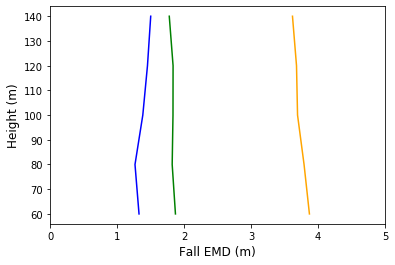

In [95]:
# Vansycle EMD SON 

fig,ax=plt.subplots()
ax.plot(VansycleEMDSONERA,VansycleZComp, label = 'ERA-5',color='orange')
ax.plot(VansycleEMDSONMERRA,VansycleZComp,label='MERRA-2',color='green')
ax.plot(VansycleEMDSONWRF,VansycleZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Fall EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('VansycleEMDSON')